## This notebook shows how to open data files (produced in DD4Hep), and plot hit distributions. It uses awkard arrays. 

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt

import numpy as np
import awkward as ak
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
import sys  
sys.path.insert(0, '/home/bishnu/bishnu/EIC/regressiononly/functions')
from plotting import *
import matplotlib.colors as mcolors
import subprocess

# Run the Git command to get the current branch
current_branch = subprocess.check_output(["git", "rev-parse", "--abbrev-ref", "HEAD"]).strip().decode("utf-8")

# Print the current branch
current_branch

/home/bishnu/miniconda3/envs/tensorflow/lib/python3.8/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
2023-10-31 14:14:40.617667: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 14:14:41.179978: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



Using variable strings ['E', 'X', 'Y', 'Z'] from binning_utils.py



'ZDC'

## Get data, transform into akward arrays

In [ ]:
#input_file = 'rec_piplus_1k.root'
input_file = "insert_reco_pi+_55GeV_theta_17deg.root"
#filename = "hcal_only.root"
events = ur.open("%s:events"%(input_file))
#events.show()
events.keys()
arrays = events.arrays()


## Hit postion distributions

In [ ]:
fig = plt.figure( figsize=(8, 6))

#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60)
#plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60)
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100, range=(3000,5000),label='HCAL')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.position.z']),bins=100,range=(3000,5000), label='ECAL')
plt.yscale('log')
plt.xlabel('z position [mm]')
plt.ylabel('hits')
plt.legend()
plt.show()

In [ ]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.x']),bins=60,label='ecal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.local.y']),bins=60, label='ecal y',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.x']),bins=60,label='hcal x',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.local.y']),bins=60, label='hcal y',alpha=0.85,histtype='step')
plt.legend()
#plt.yscale('log')
plt.xlabel('position [mm]')
plt.ylabel('hits')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.local.x'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([-3500,3500],[-3500,3500]),norm=mcolors.PowerNorm(0.2))


ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(16, 6),sharex=True,sharey=True)
x = ak.flatten(arrays['EcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['EcalEndcapPHitsReco.local.y'])
ax[0].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))

x = ak.flatten(arrays['HcalEndcapPHitsReco.position.z'])
y = ak.flatten(arrays['HcalEndcapPHitsReco.local.y'])
ax[1].hist2d(np.array(x),np.array(y),bins=200, range=([3500,5000],[-5000,5000]),norm=mcolors.PowerNorm(0.2))


ax[0].set_xlabel('z position [mm]')
ax[1].set_xlabel('y position [mm]')

ax[1].set_title('HCAL hits')
ax[0].set_title('ECAL hits')

plt.show()

## Hit energy distributions

In [ ]:
fig = plt.figure( figsize=(8, 6))
plt.hist(ak.flatten(arrays['EcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100),label='ECAL',alpha=0.85,histtype='step')
plt.hist(ak.flatten(arrays['HcalEndcapPHitsReco.energy']),bins=np.geomspace(0.0001,1,100), label='HCAL',alpha=0.85,histtype='step')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('hits')
plt.xlabel('hit energy [MeV]')
plt.show()

In [ ]:
HCALhits = arrays['HcalEndcapPHitsReco.energy'][:,:]
mask = HCALhits<1e10
HCALhits = HCALhits[mask]
HCAL_total = ak.sum(HCALhits,axis=-1)
HCAL_average = ak.mean(HCALhits,axis=-1)
HCAL_nhits = ak.num(HCALhits)

print('total HCAL energy' , HCAL_total)
print('Average hit energy in HCAL' , HCAL_average)


ECALhits = arrays['EcalEndcapPHitsReco.energy'][:,:]
mask = ECALhits<1e10
ECALhits = ECALhits[mask]
ECAL_total = ak.sum(ECALhits,axis=-1)
ECAL_average = ak.mean(ECALhits,axis=-1)
ECAL_nhits = ak.num(ECALhits)

print('total ECAL energy' , ECAL_total)
print('Average hit energy in ECAL' , ECAL_average)

print(np.shape(HCAL_total),np.shape(ECAL_total))

In [ ]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_total,bins=100,alpha=0.5,range=(0,40),label='HCAL')
plt.hist(ECAL_total,bins=100,alpha=0.5,range=(0,40),label='ECAL')

plt.xlabel('Summed energy')
plt.ylabel('events')
plt.legend()

plt.show()


In [ ]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_average,bins=100,alpha=0.5,range=(0,1),label='HCAL')
plt.hist(ECAL_average,bins=100,alpha=0.5,range=(0,1),label='ECAL')

plt.xlabel('average HCAL hit energy')
plt.ylabel('events')
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
fig = plt.figure( figsize=(6, 6))

plt.hist(HCAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='HCAL')
plt.hist(ECAL_nhits,bins=100,alpha=0.5,range=(0,1000),label='ECAL')

plt.xlabel('number of hits')
plt.ylabel('events')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.show()


In [ ]:
print(arrays['MCParticles.generatorStatus'])
pz = ak.to_numpy(arrays['MCParticles.momentum.z'][:,2])
py = ak.to_numpy(arrays['MCParticles.momentum.y'][:,2])
px = ak.to_numpy(arrays['MCParticles.momentum.x'][:,2])
mass = ak.to_numpy(arrays['MCParticles.mass'][:,2])
pz_wrong = ak.to_numpy(arrays['MCParticles.momentum.z'][:,2])

p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

In [ ]:
p_wrong = np.sqrt(ak.to_numpy(arrays['MCParticles.momentum.x'][:,-1])**2 +
                  ak.to_numpy(arrays['MCParticles.momentum.y'][:,-1])**2 +
                  ak.to_numpy(arrays['MCParticles.momentum.z'][:,-1])**2 )

plt.hist(p_wrong,alpha=0.3,label="MC Index = -1")
plt.hist(p,alpha=0.3,label="MC Index = 2")
plt.legend(fontsize=10)
plt.title("MC Momentum, Two Ways")

In [ ]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
#plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

# Cluster Sums vs $E_\mathrm{Generated}$

In [ ]:
ecal_cluster_sum = np.sum(arrays['EcalEndcapPHitsReco.energy'],axis=-1)
hcal_cluster_sum = np.sum(arrays['HcalEndcapPHitsReco.energy'],axis=-1)
cluster_sum = ecal_cluster_sum + hcal_cluster_sum

cluster_total = ECAL_total+HCAL_total
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

HCAL_total = ak.sum(HCALhits,axis=-1)
ECAL_total = ak.sum(ECALhits,axis=-1)

In [ ]:
print(np.shape(hcal_cluster_sum))
print(np.shape(HCAL_total))
print(np.shape(gen_E))

In [ ]:
mask = np.full(len(HCAL_total),True)

gen_E = gen_E[mask]
HCAL_total = HCAL_total[mask]
ECAL_total = ECAL_total[mask]
cluster_total = ECAL_total+HCAL_total
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E,HCAL_total,alpha=0.005)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E,ECAL_total,alpha=0.005)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E,cluster_total,alpha=0.005)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("No Cuts",fontsize=30)

### Apply cell cuts

In [ ]:
mip_E = 0.00006 #minimum ionizing particle
spikey_E = 1e10
max_T = 200
    
ecal_time_mask = arrays['EcalEndcapPHitsReco.time'] < max_T
ecal_mip_mask = arrays['EcalEndcapPHitsReco.energy'] > mip_E
ecal_spike_mask = arrays['EcalEndcapPHitsReco.energy'] <= spikey_E

hcal_time_mask = arrays['HcalEndcapPHitsReco.time'] < max_T
hcal_mip_mask = arrays['HcalEndcapPHitsReco.energy'] > mip_E
hcal_spike_mask = arrays['HcalEndcapPHitsReco.energy'] <= spikey_E

e_cell_cuts = [ecal_time_mask, ecal_spike_mask, ecal_mip_mask]
h_cell_cuts = [hcal_time_mask, hcal_spike_mask, hcal_mip_mask]

e_cell_mask = np.full(len(ecal_time_mask),True)
h_cell_mask = np.full(len(hcal_time_mask),True)

for e_cut,h_cut in zip(e_cell_cuts,h_cell_cuts):
    e_cell_mask = np.logical_and(e_cell_mask,e_cut)
    h_cell_mask = np.logical_and(h_cell_mask,h_cut)
    

ecal_cut_cluster_sum = np.sum(arrays['EcalEndcapPHitsReco.energy'][e_cell_mask],axis=-1)
hcal_cut_cluster_sum = np.sum(arrays['HcalEndcapPHitsReco.energy'][h_cell_mask],axis=-1)
cluster_cut_total = ecal_cut_cluster_sum+hcal_cut_cluster_sum

print(hcal_cut_cluster_sum)
print(HCAL_total)
print(np.shape(hcal_cut_cluster_sum))

### Apply Cluster Cuts

In [ ]:
minGenE = 0.5
minSum = 0.0
gen_code_keep = 1
min_theta = 1.0

mask = np.full(len(HCAL_total),True)
mask = np.logical_and(mask, gen_E > minGenE)
mask = np.logical_and(mask,hcal_cut_cluster_sum > minSum)
mask = np.logical_and(mask,ecal_cut_cluster_sum > minSum)
#mask = np.logical_and(mask, genStat==gen_code_keep)
#print(genStat==gen_code_keep)
print(len(hcal_cut_cluster_sum[mask]))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), constrained_layout=True)

axes[0].scatter(gen_E[mask],hcal_cut_cluster_sum[mask],alpha=0.005)
axes[0].set_xlabel("Generated Energy",fontsize=20)
axes[0].set_ylabel("HCal Cell Sum",fontsize=20)
axes[0].set_title("Raw HCal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[1].scatter(gen_E[mask],ecal_cut_cluster_sum[mask],alpha=0.005)
axes[1].set_xlabel("Generated Energy",fontsize=20)
axes[1].set_ylabel("ECal Cell Sum",fontsize=20)
axes[1].set_title("Raw ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)

axes[2].scatter(gen_E[mask],cluster_total[mask],alpha=0.005)
axes[2].set_xlabel("Generated Energy",fontsize=20)
axes[2].set_ylabel("ECal+HCal Cell Sum",fontsize=20)
axes[2].set_title("Raw HCal+ECal Sum vs. $E_\mathrm{Gen.}$",fontsize=25)
_ = plt.suptitle("With Cuts",fontsize=30)

### $\uparrow$ If above is empty, increase the alpha from 0.005!

In [ ]:
from copy import copy
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(nrows=1, figsize=(14, 10), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))

cluster_edges=np.linspace(-0.1,2.5,121)
truth_edges=np.linspace(-10,110,121)
h, xedges, yedges = np.histogram2d(gen_E[mask],hcal_cut_cluster_sum[mask], bins=[truth_edges, cluster_edges])
#xedges=yedges
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmin=1.0e-2,vmax=1.1e3), rasterized=True)
cb = fig.colorbar(pcm, ax=axes, pad=0)
cb.set_label("Counts",fontsize=22)
cb.ax.tick_params(labelsize=20)
axes.set_xlabel("Generated Energy",fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylim(-0.1,2.5)
plt.xlim(-0,101)
axes.set_ylabel("HCal Sum Energy",fontsize=25)
axes.set_title("[ROOT] HCal Sum vs. Generated Energy",fontsize=30)

In [6]:
'''
def read_start_stop_local(file_path, detector, NumEvents, include_ecal=True):
    import uproot as ur
    MIP_TH_ecal=0.5 * 0.13
    Time_TH_ecal=150
    root_files = os.listdir(file_path)
    selected_file = random.choice(root_files)
    file = os.path.join(file_path, selected_file)
    
    ur_tree = ur.open(file)['events']
    #ur_tree = ur_file['events']
    num_entries = ur_tree.num_entries
    if (NumEvents==-1) or (NumEvents>num_entries):
        NumEvents=num_entries
    event_data=ur_tree.arrays(entry_stop=NumEvents)
    #num_entries=int(train_frac*num_entriesss)
    print("Total Entries ", num_entries)
    
    #print(means.shape,'      ',stds.shape)
    #print("PRINT  DETECTOR ", detector)    
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150
        theta_max=600.0
        sampling_fraction=0.0224
    elif detector=='ecal':
        detector_name = "EcalEndcapPHitsReco"
        MIP_TH_ecal=0.5 * 0.13
        Time_TH_ecal=150
        theta_max=600.0
        sampling_fraction=1.0
        
    elif detector=="hcal_insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150.0
        theta_max=600.0
        sampling_fraction=0.0224
        
    elif detector=="zdc":
        detector_name="ZDCHcalHitsReco"
        MIP_TH=0.5 * 0.000393
        Time_TH=275.0
        theta_max=10.0
        sampling_fraction=0.0216
        
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
            
    
    genPx = event_data['MCParticles.momentum.x'][:,2]
    genPy = event_data['MCParticles.momentum.y'][:,2]
    genPz = event_data['MCParticles.momentum.z'][:,2]
    mass = event_data["MCParticles.mass"][:,2]
    root_gen_P = np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
    mom=np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
    theta=np.arccos(genPz/mom)*1000  ## in mili radians
    gen_energy=np.sqrt(root_gen_P**2 + mass**2)
    
    hit_e =event_data[f'{detector_name}.energy']
    time =event_data[f'{detector_name}.time']
    posx =event_data[f'{detector_name}.position.x']/10.
    posy =event_data[f'{detector_name}.position.y']/10.
    posz =event_data[f'{detector_name}.position.z']/10.
    
    mask=np.logical_and(hit_e>MIP_TH , time<Time_TH)
    hit_e = hit_e[mask]
    posx=posx[mask]
    posy=posy[mask]
    posz=posz[mask]
    cluster_sum_hcal=(np.sum(hit_e, axis=-1))/sampling_fraction

    
    if include_ecal==True:
        detector_name='EcalEndcapPHitsReco'
        hit_e_ecal =event_data[f'{detector_name}.energy']
        time_ecal =event_data[f'{detector_name}.time']
        mask_ecal=np.logical_and(hit_e_ecal>MIP_TH_ecal , time_ecal<Time_TH_ecal)
        hit_e_ecal = hit_e_ecal[mask_ecal]
        cluster_sum_ecal=np.sum(hit_e_ecal, axis=-1)
        cluster_sum_total=cluster_sum_hcal + cluster_sum_ecal
        
        
    else:
        cluster_sum_total=cluster_sum_hcal
        cluster_sum_ecal=None
        
    
   
    
    return hit_e, posx, posy, posz, genPx, genPy, gen_energy, theta, cluster_sum_total , cluster_sum_hcal, cluster_sum_ecal 

'''  

In [2]:
#file_path=f'/media/miguel/Elements/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_unstaggered_08_26/'
detector='insert'  # zdc , hcal, insert, ecal
readout='None'  # h4, #h3, # Unstagered  #square
particle= 'pi+'    #'pi+'  'neutron'
data_type='continuous'   #continuous, discrete
absorber='10W_54Fe' #'4W_60Fe' #'64_Fe' #1.  64_Pb or 64_Fe (for zdc), 2. 
include_ecal=True

disk=f'/media/miguel/Elements'
conditions = {
    ('zdc', 'neutron', 'continuous', '64Pb',  'h4', False):{
    'file_path': f'{disk}/zdc_data/zdc_Pb_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_09_23/',
    'title': 'ZDC Continuous Data Set \nAbsorbers = 64 Pb  \n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
    \n readout= Staggered H4',
    },
        
    ('zdc', 'neutron', 'discrete', '64Pb',  'h4', False):{
    'file_path': f'{disk}/zdc_data/zdc_Pb_neutron_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_09_23/',
    'title': 'ZDC Discrete Data Set\nAbsorbers = 64 Pb \n  particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Staggered H4',
    },
    ## ----------ZDC STAGGERED H4--------------------------
    
    ('zdc', 'neutron', 'continuous', '64Fe',  'h4', False): {
    'file_path':f'{disk}/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_08_18/',
       
    'title': 'ZDC Continuous Data Set\nAbsorbers = 64 Fe\n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Staggered H4',
    },
    
    ('zdc', 'neutron', 'discrete', '64Fe',  'h4', False):{
    'file_path': f'{disk}/zdc_data/zdc_neutron_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_08_29/',
    'title': 'ZDC Discrete Data Set\n Absorbers = 64 Fe \n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$ \
        \n readout= Staggered H4',
    },
    
    ('zdc', 'neutron', 'continuous', '64Fe',  'h3', False): {
    'file_path':f'{disk}/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h3_08-23-23/',
    'title': 'ZDC Continuous Data Set\n Absorbers = 64 Fe\n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Staggered H3',
    },
   
     ('zdc', 'neutron', 'continuous', '64Fe',  'Unstaggered', False): {
    'file_path':f'{disk}/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_unstaggered_08_26/',    
    'title': 'ZDC Continuous Data Set\n Absorbers = 64 Fe\n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Unstaggered',
    },
    
    
   ('zdc', 'neutron', 'continuous', '64Fe',  'square', False): {
    'file_path':f'{disk}/zdc_data/zdc_neutron_log10continuous_10GeV-300GeV_0.0deg-0.5deg_square_07-05/reco/',
    'title': 'ZDC Continuous Data Set\n Absorbers = 64 Fe\n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
    \n readout= Square',
    },
    
   ('zdc', 'neutron', 'discrete', '64Fe',  'square', False): {
    'file_path':f'{disk}/zdc_data/zdc_neutron_log2discrete_4GeV-256GeV_0.0deg-0.5deg_square_07-05/reco/',
    'title': 'ZDC Discrete Data Set\n Absorbers = 64 Fe\n particle = neutron \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Square',
    },
    
    ('zdc', 'pi0', 'continuous', '64Fe',  'h4', False): {
    'file_path':f'{disk}/zdc_data/zdc_pi0_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_23/',
    'title': 'ZDC Continuous Data Set\n Absorbers = 64 Fe\n particle = $\pi^{0}$ \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Staggered H4',
    },
    
     ('zdc', 'pi0', 'discrete', '64Fe',  'h4', False): {
    'file_path':f'{disk}/zdc_data/zdc_pi0_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_12/',
    'title': 'ZDC discrete Data Set\n Absorbers = 64 Fe\n particle = $\pi^{0}$ \n $\\theta_{Truth}= 0 - 8 [mrad]$\
        \n readout= Staggered H4',
    },
    
    
    ('zdc', 'gamma', 'continuous', '64Fe',  'h4', False): {
    'file_path':f'{disk}/zdc_data/zdc_gamma_log10continuous_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_14/',  
    'title': 'ZDC Continuous Data Set\n Absorbers = 64 Fe\n particle = $\gamma$ \n $\\theta_{Truth}= 0 - 8 [mrad]$\
    \n readout= Staggered H4',
    },
    
     ('zdc', 'gamma', 'discrete', '64Fe',  'h4', False): {
    'file_path':f'{disk}/zdc_data/zdc_gamma_log10discrete_10GeV-300GeV_0.0deg-0.5deg_staggered_h4_10_14/',
    'title': 'ZDC discrete Data Set\n Absorbers = 64 Fe\n particle = $\gamma$ \n $\\theta_{Truth}= 0 - 8 [mrad]$\
    \n readout= Staggered H4',
    },
    
      ## ----------------HCAL ---------------------
    ('hcal', 'pi+', 'continuous', '0W_64Fe', 'None',True):{
    'file_path': f'{disk}/ECCE_HCAL/hcal_ecal_ECCE_64Fe_pi+_log10continuous_1GeV-150GeV_10deg-30deg_09-27-23/',
    'title': 'HCal Continuous Data Set \n ECal in front of HCal \n Absorbers = 0 W + 64 Fe \nparticle= $\pi^{+}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
    ('hcal', 'pi+', 'discrete', '0W_64Fe', 'None', True): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_ecal_ECCE_64Fe_pi+_log10discrete_1GeV-150GeV_10deg-30deg_09-29-23/',
    'title': 'HCal Discrete Data Set\n ECal in front of HCal\n Absorbers = 0 W + 64 Fe \n particle=$\pi^{+}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
    
    #-------------------- CASE WITH HCAL ONLY
    ('hcal', 'pi0', 'continuous', '4W_60Fe', 'None', False):{
    'file_path': f'{disk}/ECCE_HCAL/hcal_only_pi0_log10continuous_1GeV-150GeV_10deg-30deg_08-20-23/',
    'title': 'HCal Continuous Data Set \n No ECal in front of HCal \n Absorbers = 4 W + 60 Fe \nparticle= $\pi^{0}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
    
     ('hcal', 'pi+', 'continuous', '4W_60Fe', 'None', False):{
    'file_path': f'{disk}/ECCE_HCAL/hcal_only_pi+_log10continuous_1GeV-150GeV_10deg-30deg_08-16-23/',
    'title': 'HCal Continuous Data Set \n No ECal in front of HCal \n Absorbers = 4 W + 60 Fe \nparticle= $\pi^{+}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
    
    ('hcal', 'pi+', 'discrete', '4W_60Fe', 'None', False): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_only_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-19-23/',
    'title': 'HCal Discrete Data Set\n No ECal in front of HCal\n Absorbers = 4 W + 60 Fe \n particle=$\pi^{+}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
    
  
    ## ------- HCAL AND ECAL FILES --------------------
    
    ('hcal', 'pi+', 'continuous', '4W_60Fe', 'None', True): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_pi+_log10continuous_1GeV-150GeV_10deg-30deg_07-21-23/',
    'title': 'HCal Continuous Data Set\n ECal in front of HCal\n Absorbers = 4 W +  60 Fe \n particle = $\pi^{+}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
    
    ('hcal', 'pi+', 'discrete', '4W_60Fe', 'None', True): {
    'file_path':f'{disk}/ECCE_HCAL/hcal_pi+_log10discrete_1GeV-150GeV_10deg-30deg_08-23-23/',
    'title': 'HCal Discrete Data Set\n ECal in front of HCal\n Absorbers = 4 W + 60 Fe \n particle= $\pi^{+}$ \n $\\theta_{Truth}= 10 - 30 $ [degree]',
    },
       ## ----------------HCAL INSERT---------------------
    ('insert', 'pi+', 'continuous', '10W_54Fe', 'None', True):{
    'file_path': f'{disk}/ECCE_HCAL/insert_pi+_log10continuous_1GeV-150GeV_2.3deg-4.25deg_10-3-23/',
    'title': 'Insert Continuous Data Set\n ECal in front of HCal\n Absorbers = 10 W + 54 Fe \n particle=$\pi^{+}$\n $\\theta_{Truth}= 2.3 - 4.25 $ [degree]',
    }
    ,
    ('insert', 'pi+', 'discrete', '10W_54Fe', 'None', True): {
    'file_path':f'{disk}/ECCE_HCAL/insert_pi+_log10discrete_1GeV-150GeV_2.3deg-4.25deg_10-05-23/',
     'title': 'Insert Discrete Data Set\n ECal in front of HCal\n Absorbers = 10 W + 54 Fe $\pi^{+}$ \n $\\theta_{Truth}= 2.3 - 4.25 $ [degree]',
    },
    
    ('insert', 'pi+', 'continuous', '0W_64Fe', 'None', True): {
    'file_path': f'{disk}/ECCE_HCAL/insert_64Fe_pi+_log10continuous_1GeV-150GeV_2.3deg-4.25deg_10-8-23/',
    'title': 'Insert Continuous Data Set\n ECal in front of HCal\n Absorbers = 0 W + 64 Fe \n particle=$\pi^{+}$ \n $\\theta_{Truth}= 2.3 - 4.25 $ [degree]',
    },
    ('insert', 'pi+', 'discrete', '0W_64Fe', 'None', True): {
    'file_path':f'{disk}/ECCE_HCAL/insert_64Fe_pi+_log10discrete_1GeV-150GeV_2.3deg-4.25deg_10-8-23/',
    'title': 'Insert Discrete Data Set\n ECal in front of HCal\n Absorbers = 0 W + 64 Fe \n particle= $\pi^{+}$ \n $\\theta_{Truth}= 2.3 - 4.25 $ [degree]',
    }
}


default_entry = {
    'file_path': 'No_File',
    'title': 'No_Title',
}

entry = conditions.get((detector, particle, data_type, absorber, readout, include_ecal), default_entry)
file_path = entry['file_path']
title = entry['title']

if entry['file_path'] == 'No_File':
    print('File not found')
    

hit_e, posx, posy, posz, genPx, genPy, gen_energy, theta, cluster_sum_total, cluster_sum_hcal, cluster_sum_ecal=\
read_start_stop_local(file_path, detector, NumEvents=-1, include_ecal=include_ecal)

Total Entries  6000


In [51]:
mean=np.mean(ak.flatten(hit_e))
std=np.std(ak.flatten(hit_e))
print(np.log10(mean), np.log10)
print

-2.4291407245820826


In [56]:
10**-2.50 - 10**-2.42

-0.0006396163030372333

## Write the configuration on first page

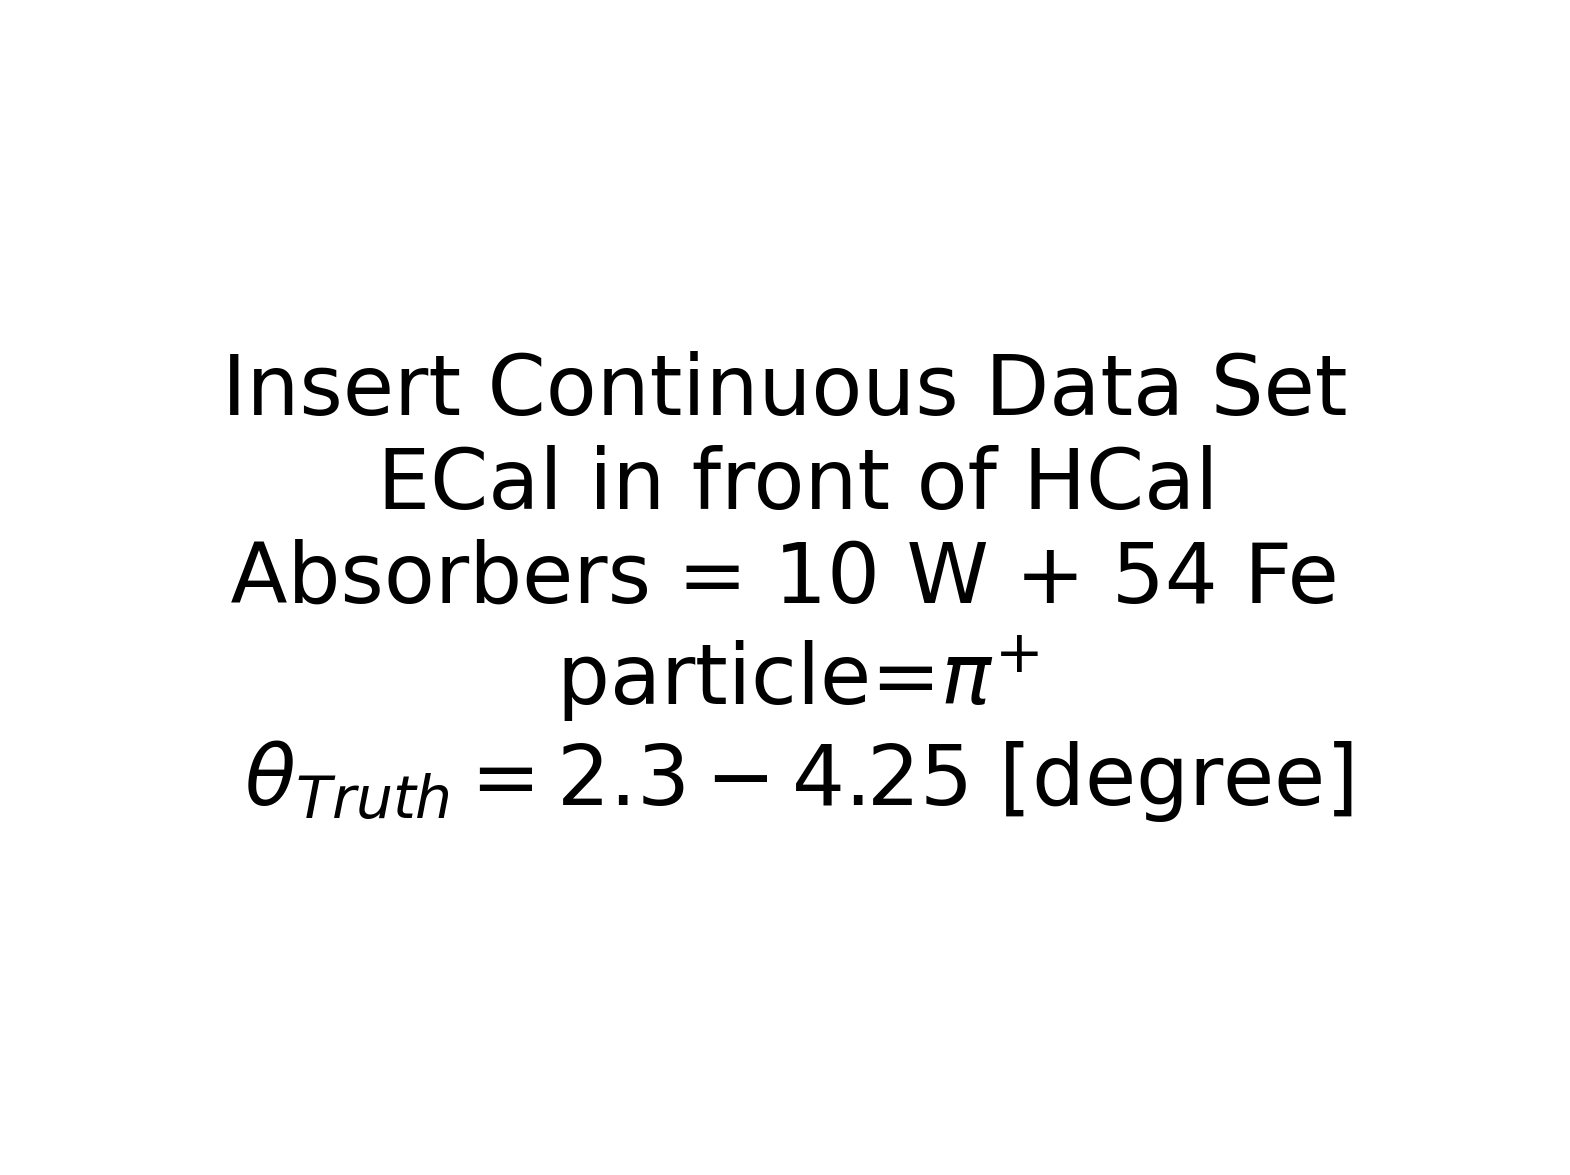

In [3]:
from matplotlib.backends.backend_pdf import PdfPages
path_to_output_file='/home/bishnu/bishnu/EIC/QAPlots'
# Create a PDF file to save the plots
pdf_pages = PdfPages(f'{path_to_output_file}/QA_{detector}_{particle}_{readout}_{absorber}_{data_type}_ECAL_{include_ecal}.pdf')

fig0, ax0 = plt.subplots(figsize=(20,15))


ax0.text(0.5, 0.5, f'{title}', fontsize=60, ha='center', va='center', color='black')

# Remove axis labels and ticks
ax0.axis('off')
pdf_pages.savefig(fig0 ,  bbox_inches='tight')


## Plot Cell hit E, X, Y, Z 

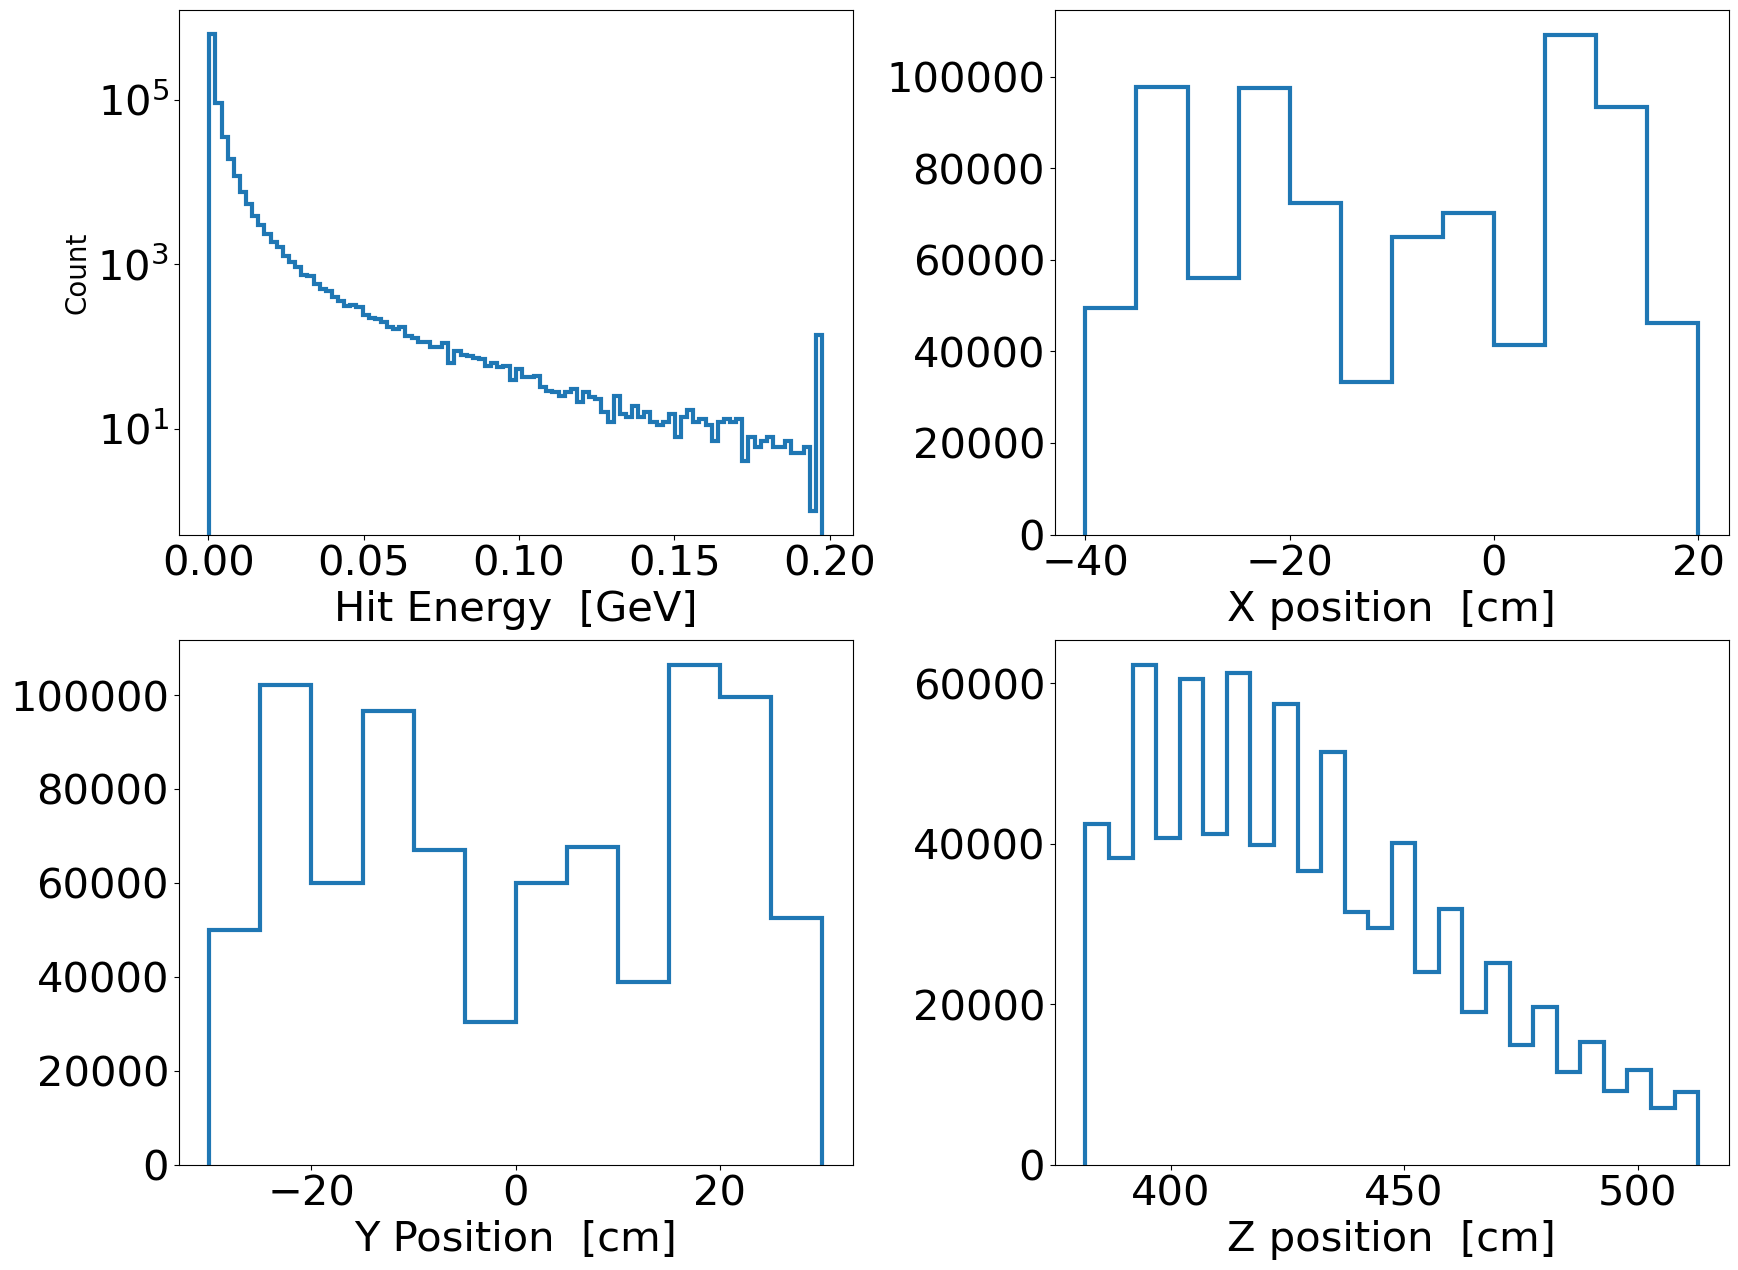

In [4]:
nrows=2
ncols=2
fig2, ax2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
variables=[ hit_e, posx, posy, posz]
titles=['Hit Energy','X position', 'Y Position', 'Z position']
for index, (variable, title) in enumerate(zip(variables, titles)):
    #print(index, '   ', title)
    irow=int(index/nrows)
    icol=index%ncols
    #print(irow,'   ',  icol)
    min_range=np.min(ak.flatten(variable))
    max_range=np.max(ak.flatten(variable))
    
    if index==0:
        ax2[irow, icol].set_ylabel("Count", fontsize=20)
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [GeV]", fontsize=30)
        ax2[irow, icol].set_yscale('log')
        nbins=100
    else:    
        nbins=int((max_range-min_range)/5.0) 
        ax2[irow, icol].set_xlabel(f"{titles[index]}  [cm]", fontsize=30)
        
    ax2[irow, icol].hist(ak.flatten(variable), bins=nbins, histtype='step', linewidth=3)
    
    
    #print(min_range, '   ', max_range, '   ',nbins)    
        
    
    ax2[irow, icol].yaxis.set_tick_params(labelsize=30)
    ax2[irow, icol].xaxis.set_tick_params(labelsize=30)
plt.subplots_adjust(wspace=0.3, hspace=0.2)    
#plt.tight_layout()
pdf_pages.savefig(fig2,   bbox_inches='tight')



## Plot posx vs posy, px vs py, cluster sum vs true E

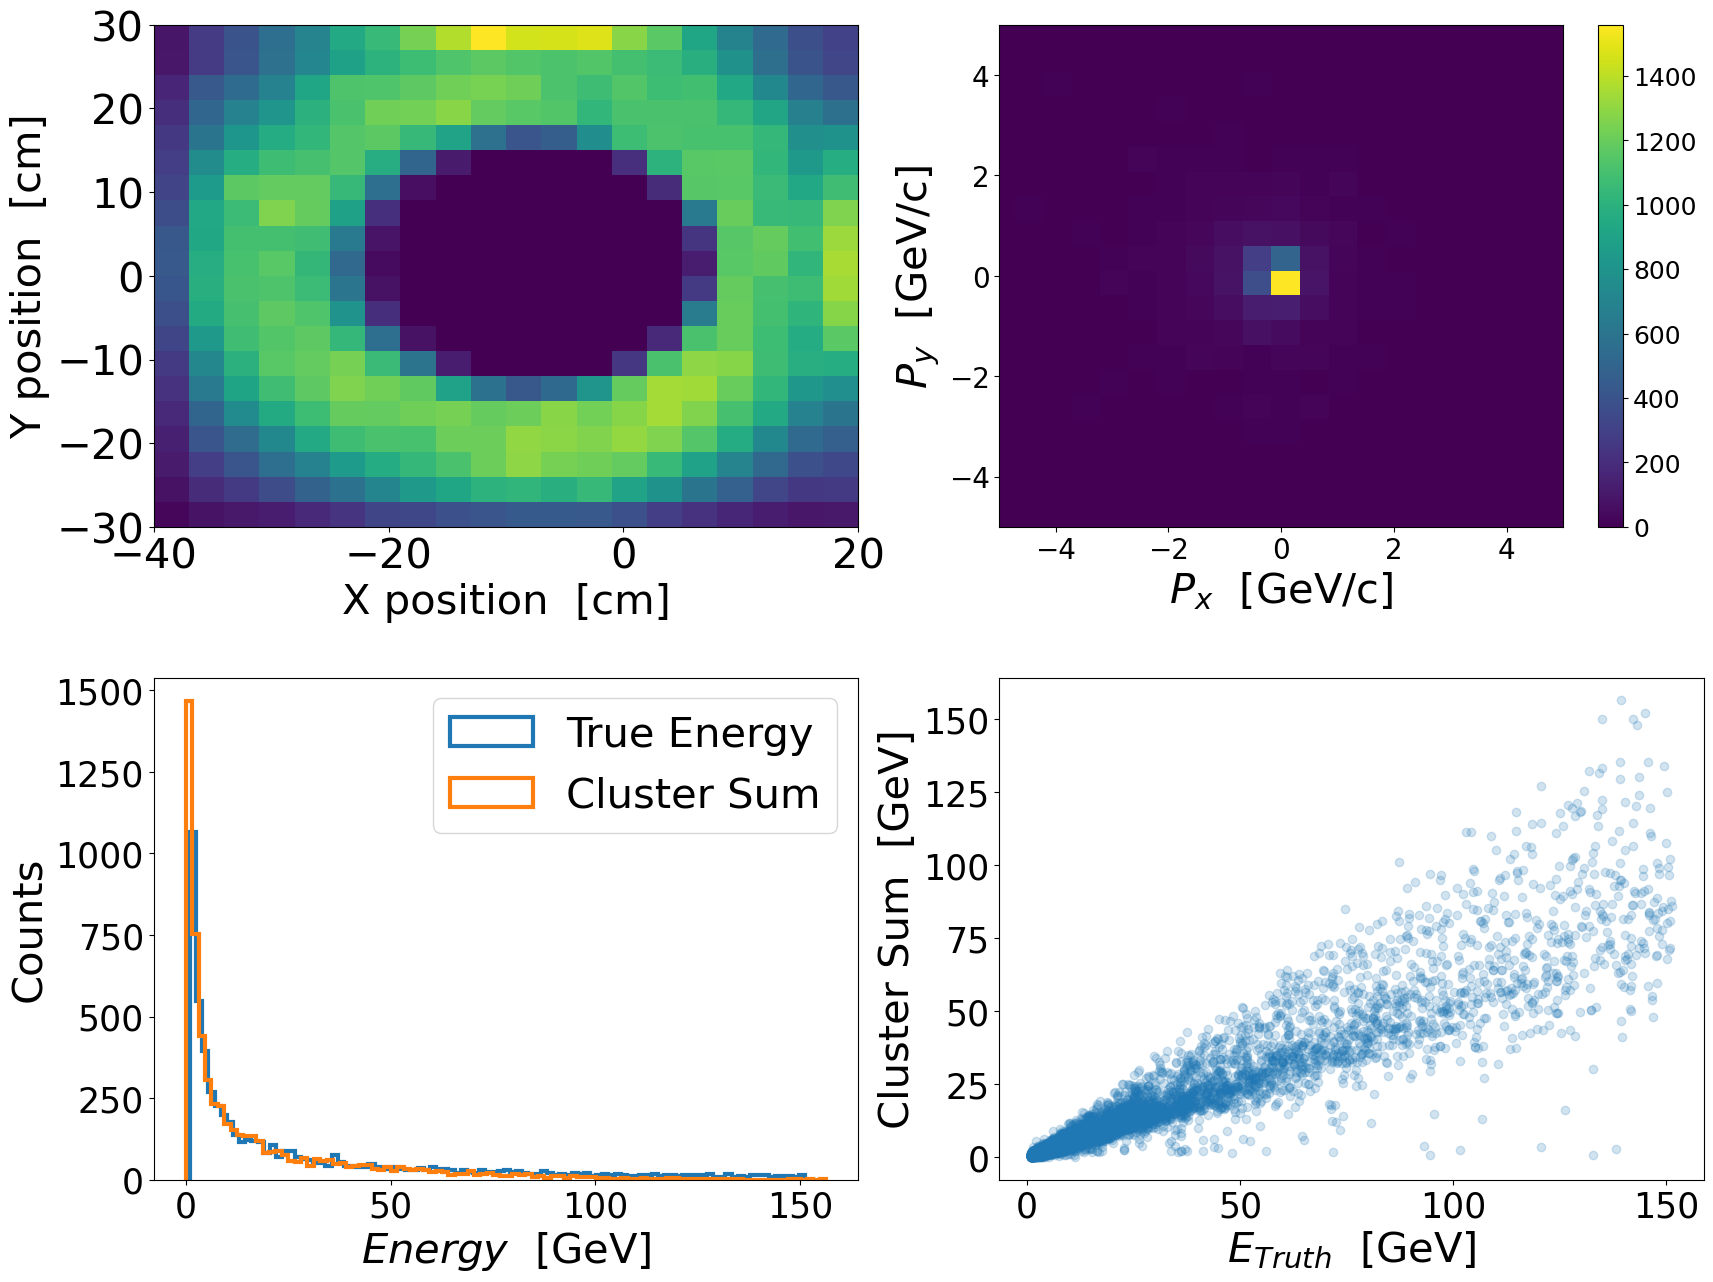

In [5]:
fig3, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
xrange=np.max(ak.flatten(posx))
xrange_min=np.min(ak.flatten(posx))

yrange=np.max(ak.flatten(posy))
yrange_min=np.min(ak.flatten(posy))


ax[0,0].hist2d(np.array(ak.flatten(posx)), np.array(ak.flatten(posy)), bins=(20, 20), cmap=plt.cm.viridis)

#scatter(ak.flatten(posx),ak.flatten(posy), alpha=0.05)
ax[0,0].set_xlim(xrange_min, xrange)
ax[0,0].set_ylim(yrange_min, yrange)
ax[0,0].set_xlabel("X position  [cm]", fontsize=30)
ax[0,0].set_ylabel("Y position  [cm]", fontsize=30)
ax[0,0].yaxis.set_tick_params(labelsize=30)
ax[0,0].xaxis.set_tick_params(labelsize=30)



'''
xrange=np.max(genPx)-30
yrange=np.max(genPy)-30

xrange_min=np.min(genPx)+30
yrange_min=np.min(genPy)+30
'''
xrange=yrange=5

h=ax[0,1].hist2d(np.array(genPx),np.array(genPy), bins=(40, 40), cmap=plt.cm.viridis)
cbar = plt.colorbar(h[3])
cbar.ax.tick_params(labelsize=18)
#cbar.set_label("Colorbar Label", fontsize=20)
#ax[0,1].set_xlim(xrange_min, xrange)
#ax[0,1].set_ylim(yrange_min, yrange)
ax[0,1].set_xlim(-xrange, xrange)
ax[0,1].set_ylim(-yrange, yrange)

#cb = fig.colorbar(hp, label='counts')
#cb.set_label('counts', fontsize=25) 
ax[0,1].set_xlabel("$P_{x}$  [GeV/c]", fontsize=30)
ax[0,1].set_ylabel("$P_{y}$  [GeV/c]", fontsize=30)

ax[0,1].yaxis.set_tick_params(labelsize=20)
ax[0,1].xaxis.set_tick_params(labelsize=20)



ax[1,0].hist(gen_energy, bins=100,  label='True Energy', histtype='step', linewidth=3)
ax[1,0].hist(cluster_sum_total, bins=100, label='Cluster Sum', histtype='step', linewidth=3)

ax[1,0].set_xlabel("$Energy$  [GeV]", fontsize=30)
ax[1,0].set_ylabel("Counts", fontsize=30)
ax[1,0].yaxis.set_tick_params(labelsize=25)
ax[1,0].xaxis.set_tick_params(labelsize=25)
ax[1,0].legend(fontsize=30)

xrange=np.max(gen_energy)+10
#hb=ax[1].hexbin(gen_energy,cluster_sum,gridsize=50, extent=(0,xrange,0,xrange))
ax[1,1].scatter(gen_energy,cluster_sum_total, alpha=0.2)

#cb = fig.colorbar(hb, label='counts')
#cb.set_label('counts', fontsize=25) 
ax[1,1].set_xlabel("$E_{Truth}$  [GeV]", fontsize=30)
ax[1,1].set_ylabel("Cluster Sum  [GeV]", fontsize=30)

ax[1,1].yaxis.set_tick_params(labelsize=25)
ax[1,1].xaxis.set_tick_params(labelsize=25)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
pdf_pages.savefig(fig3,   bbox_inches='tight')




## True Energy and Theta 

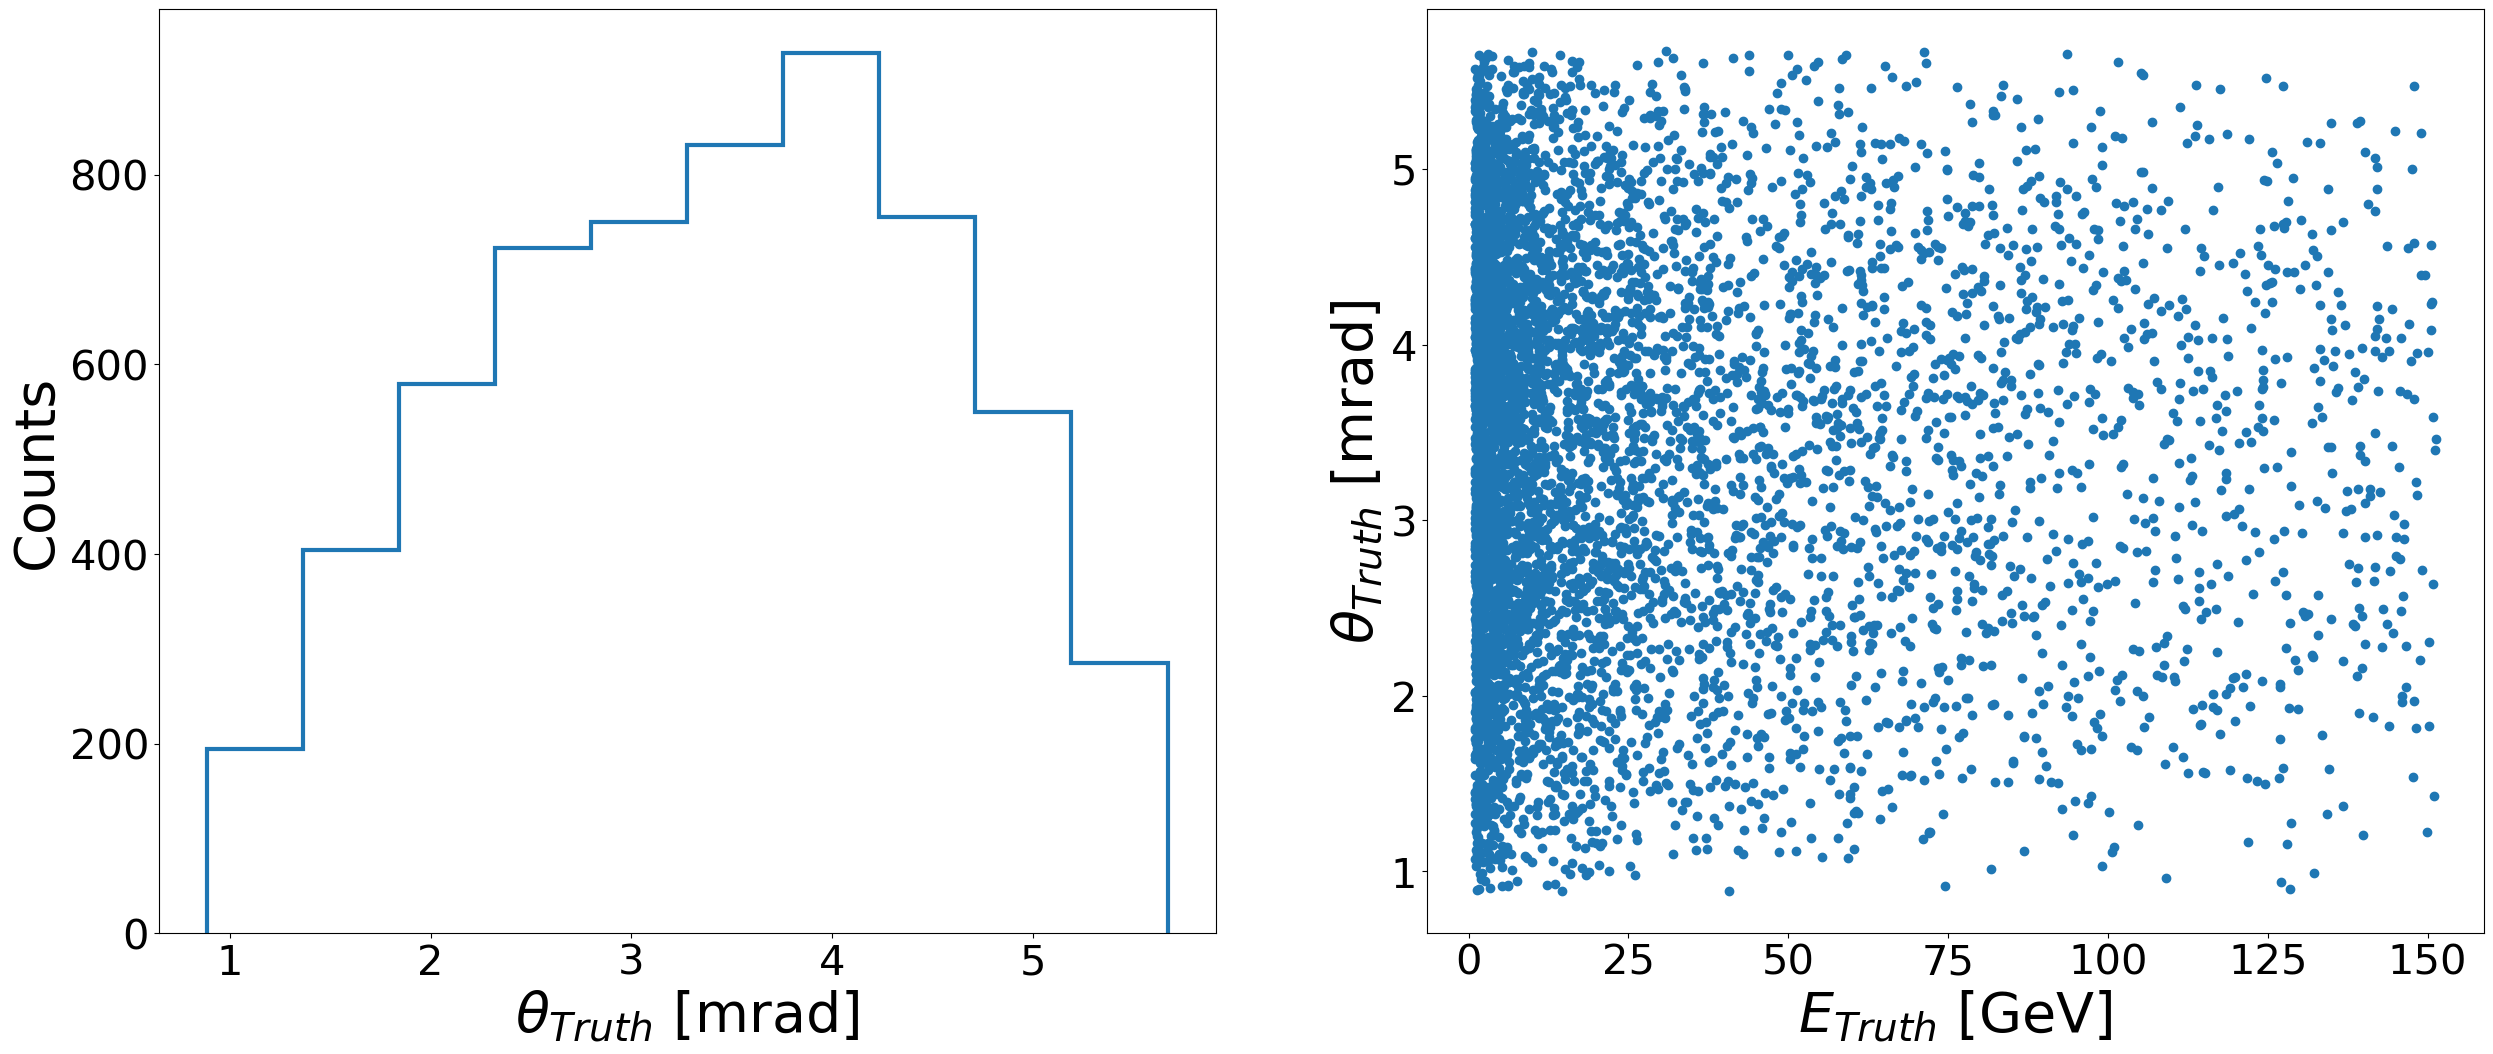

In [6]:
fig5, ax5 = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))
ax5[0].hist(theta, histtype='step', linewidth=3)
ax5[0].set_xlabel('$\\theta_{Truth}$ [mrad]', fontsize=40)
ax5[0].set_ylabel('Counts', fontsize=40)
ax5[0].yaxis.set_tick_params(labelsize=30)
ax5[0].xaxis.set_tick_params(labelsize=30)


xrange_E=np.max(gen_energy)+10
xrange_theta=np.max(theta)
#hb=ax[1].hexbin(gen_energy,theta,gridsize=100, extent=(0,xrange_E,0,xrange_theta))
ax5[1].scatter(gen_energy,theta)
#cb = fig.colorbar(hb, label='counts')
#cb.set_label('counts', fontsize=25) 

ax5[1].set_xlabel("$E_{Truth}$ [GeV]", fontsize=40)
ax5[1].set_ylabel("$\\theta_{Truth}$ [mrad]", fontsize=40)

ax5[1].yaxis.set_tick_params(labelsize=30)
ax5[1].xaxis.set_tick_params(labelsize=30)
pdf_pages.savefig(fig5, bbox_inches='tight')


['ZDCHcalHitsDigi.cellID', 'ZDCHcalHitsDigi.amplitude', 'ZDCHcalHitsDigi.timeStamp', 'ZDCHcalHitsReco.cellID', 'ZDCHcalHitsReco.energy', 'ZDCHcalHitsReco.energyError', 'ZDCHcalHitsReco.time', 'ZDCHcalHitsReco.timeError', 'ZDCHcalHitsReco.position.x', 'ZDCHcalHitsReco.position.y', 'ZDCHcalHitsReco.position.z', 'ZDCHcalHitsReco.dimension.x', 'ZDCHcalHitsReco.dimension.y', 'ZDCHcalHitsReco.dimension.z', 'ZDCHcalHitsReco.sector', 'ZDCHcalHitsReco.layer', 'ZDCHcalHitsReco.local.x', 'ZDCHcalHitsReco.local.y', 'ZDCHcalHitsReco.local.z', 'InclusiveKinematicsTruth.x', 'InclusiveKinematicsTruth.Q2', 'InclusiveKinematicsTruth.W', 'InclusiveKinematicsTruth.y', 'InclusiveKinematicsTruth.nu', 'InclusiveKinematicsTruth#0.index', 'InclusiveKinematicsTruth#0.collectionID', 'MCParticles.PDG', 'MCParticles.generatorStatus', 'MCParticles.simulatorStatus', 'MCParticles.charge', 'MCParticles.time', 'MCParticles.mass', 'MCParticles.vertex.x', 'MCParticles.vertex.y', 'MCParticles.vertex.z', 'MCParticles.endpo

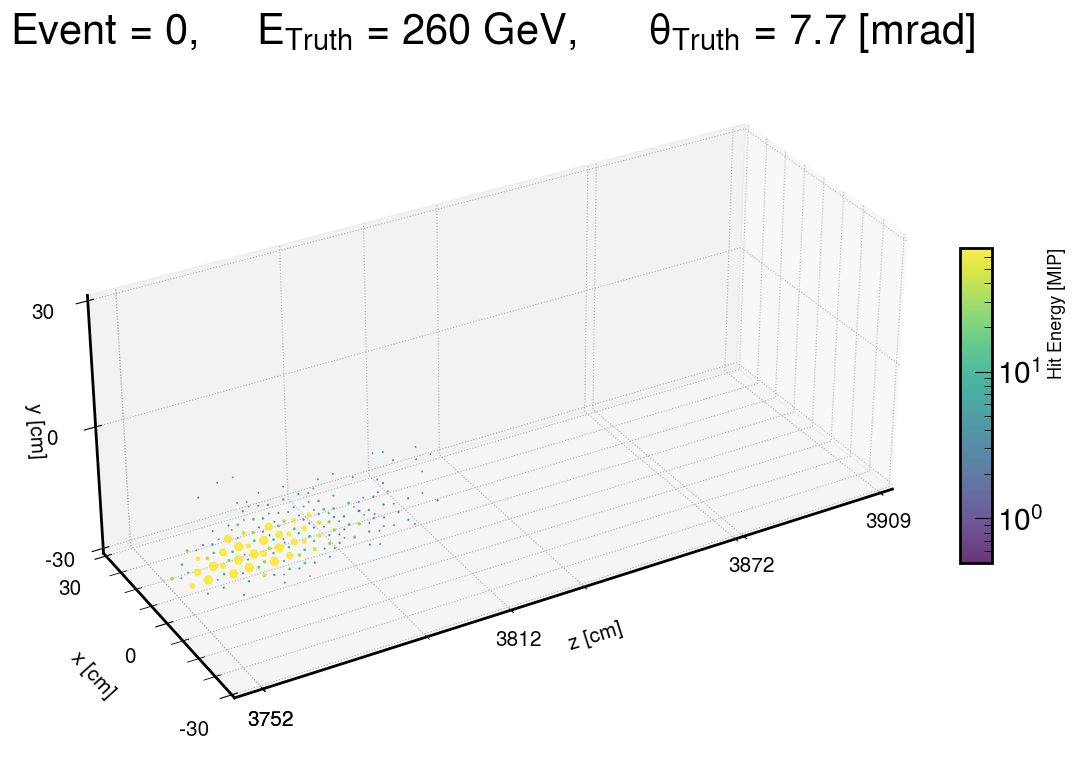

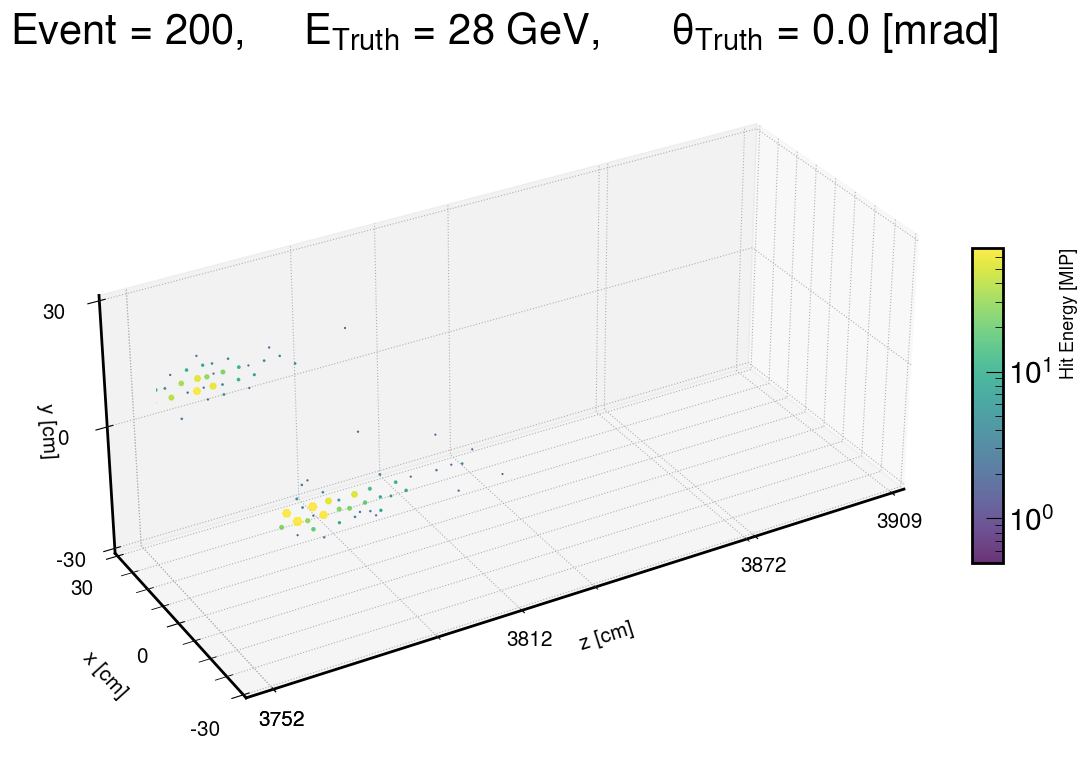

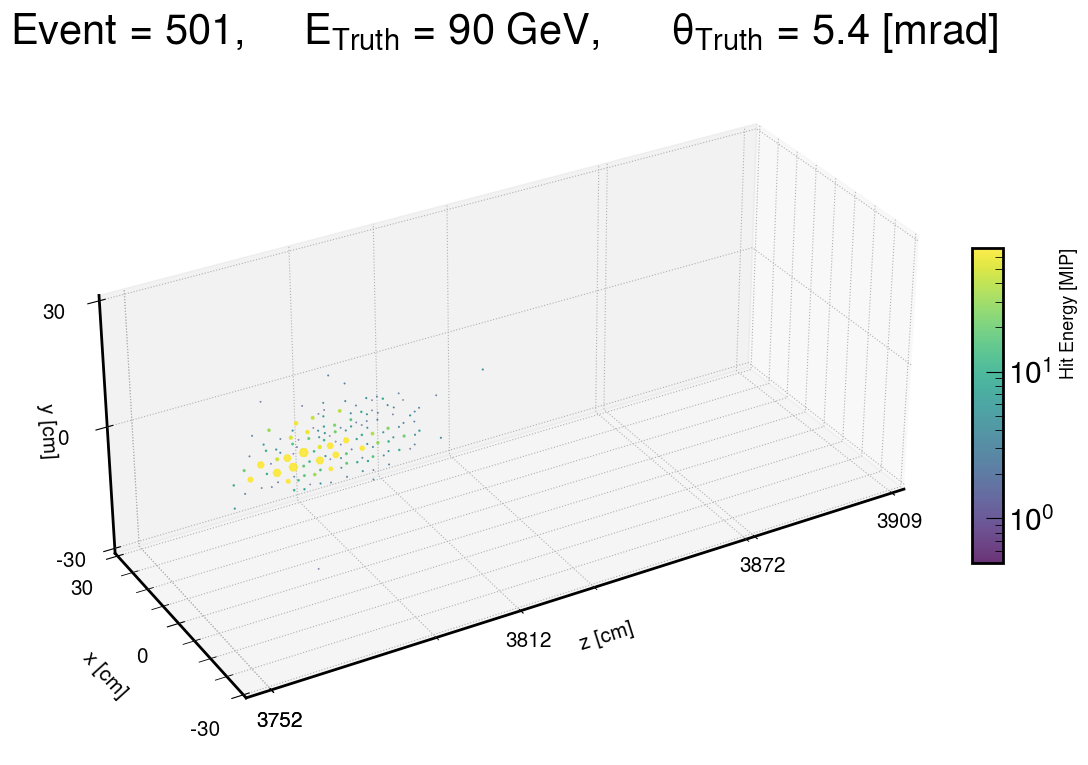

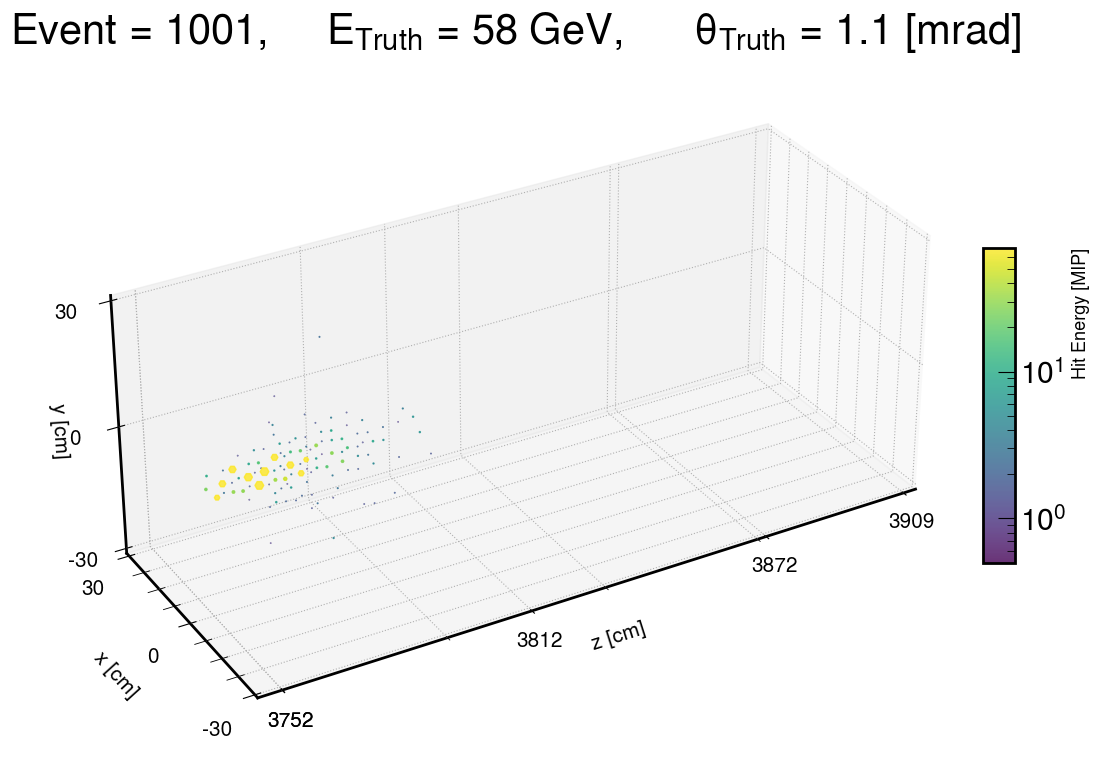

In [598]:
%matplotlib inline
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")
#MIP=0.0006
MIP= 0.000472

'''
    plt.xlim(z_min, z_max) #z
    plt.ylim(-120,-60) #x
    plt.gca().set_zlim(-30, 30) #y   
    
    y_ticks = np.arange(-120, -60, 60)
    z_ticks = np.arange(-30, 31, 30)
    
'''
def get_XYZ_dim(posx, posy, posz):
    x_min=int(np.min(ak.flatten(posx)))
    x_max=int (np.max(ak.flatten(posx)))
    
    y_min=int(np.min(ak.flatten(posy)))
    y_max=int(np.max(ak.flatten(posy)))
    
    z_min=int(np.min(ak.flatten(posz)))
    z_max=int(np.max(ak.flatten(posz)))
    
    #print(x_min, '    ', x_max, '   ', y_min, '   ', y_max, '    ', z_min, '      ', z_max)
    return x_min, x_max, y_min, y_max, z_min, z_max
def draw_event(fig, input_file, event, detector):
    scale_canvas=0.9
    
    if detector=="hcal":
        detector_name = "HcalEndcapPHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150
        theta_max=600.0
        sampling_fraction=0.0224
    elif detector=='ecal':
        detector_name = "EcalEndcapPHitsReco"
        MIP_TH=0.5 * 0.13
        Time_TH=150
        theta_max=600.0
        sampling_fraction=1.0
        
    elif detector=="insert":
        detector_name= "HcalEndcapPInsertHitsReco"
        MIP_TH=0.5 * 0.0006
        Time_TH=150.0
        theta_max=600.0
        sampling_fraction=0.0224
        
    elif detector=="zdc":
        detector_name="ZDCHcalHitsReco"
        MIP_TH=0.5 * 0.000393
        Time_TH=275.0
        theta_max=10.0
        sampling_fraction=0.0216
        
    else:
        print("Please make sure you have picked right detector name")     
        print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")
    #fig, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(8*scale_canvas, 16*scale_canvas))
    #fig=plt.figure( figsize=(8*scale_canvas, 16*scale_canvas))
    
    
    
    ax1 = fig.add_subplot(211, projection='3d',azim=-120, elev=30)
    
    
    my_cmap = plt.get_cmap('viridis')
    
    root_files = os.listdir(input_file)
    selected_file = random.choice(root_files)
    file = os.path.join(file_path, selected_file)
    events = ur.open(f'{file}:events')
    num_entries = events.num_entries
    arrays_sim = events.arrays()
    print(arrays_sim.fields)
    E=arrays_sim[f'{detector_name}.energy'][event,:]
    nhits=len(E)
    while nhits<100:
        print('I am here', event)
        event=event+1
        E=arrays_sim[f'{detector_name}.energy'][event,:]
        nhits=len(E)
        
    #E=arrays_sim[f'{detector_name}.energy'][event,:]
    x=arrays_sim[f'{detector_name}.position.x'][event,:]/10.
    y=arrays_sim[f'{detector_name}.position.y'][event,:]/10.
    z=arrays_sim[f'{detector_name}.position.z'][event,:]/10.
    
    genPx = arrays_sim['MCParticles.momentum.x'][:,2][event]
    genPy = arrays_sim['MCParticles.momentum.y'][:,2][event]
    genPz = arrays_sim['MCParticles.momentum.z'][:,2][event]
    #genP = np.log10(np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz))
    mom=np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
    theta=np.arccos(genPz/mom)*1000  ## in mili radians
    
    mom=int(mom)
    print('________________', theta)
    if theta>10:
        theta=(theta*(180/np.pi))/1000.
        theta_title=rf'${theta:.1f}^\circ$'
    else:
        theta_title=f'{theta:.1f} [mrad]'
    print(mom, 'Xxxxxxxxxxxxxxx', theta_title, ' pi --- ', np.pi)    
    
    slc=E>MIP
    sctt3d = ax1.scatter3D(z[slc], x[slc], y[slc],
                    alpha = 0.8,
                    c = E[slc]/MIP,
                    s=40*E[slc]/np.max(E),
                    cmap = my_cmap,
                    norm=mpl.colors.LogNorm(vmin=0.5, vmax=70),
                    marker ='H')
    
    
    print('Total Sum: ',ak.sum(E[slc]) /sampling_fraction)
    cbar = plt.colorbar(sctt3d, shrink=0.45, pad=0.05, aspect=10)
    cbar.set_label('Hit Energy [MIP]', fontsize=13)
    
    
    x_min, x_max, y_min, y_max, z_min, z_max=get_XYZ_dim(posx, posy, posz)
    print(x_min, '    ', x_max, '   ', y_min, '   ', y_max, '    ', z_min, '      ', z_max)
    #max_val_for_plot=np.max([x_max, y_max])
    max_val_for_plot=round(np.max([x_max, y_max])/10) *10
    #fig.colorbar(scat, shrink=0.4)
    
    plt.ylim(-max_val_for_plot,max_val_for_plot) #x
    plt.gca().set_zlim(-max_val_for_plot, max_val_for_plot) #y    
    z_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
    y_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
    
    
    ### THIS SETTING IS FOR THE SQUARE
    #plt.ylim(-120,60) #x
    #plt.gca().set_zlim(-30, 30) #y    
    #z_ticks = np.arange(-120,61 , 60)
    #y_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)##x
    ###########################
    
    #x_ticks = np.arange(z_min, z_max, 60)
    ax1.set_zticks(z_ticks)
    ax1.set_yticks(y_ticks)
    specific_values = np.array([z_min, z_max])
   
    # Generate an array with values between 3750 and 3910 with a step of 60
    x_ticks = np.arange(z_min, z_max, 60)

    # Concatenate the specific values with the generated array
    x_ticks = np.concatenate([specific_values, x_ticks])
    ax1.set_xticks(x_ticks)
    
    plt.gca().zaxis.labelpad = -2
    # , $E_{Truth}$
    
    ax1.set_title(f"Event = {event},     $E_{{Truth}}$ = {mom} GeV,      $\\theta_{{Truth}}$ = {theta_title} ", \
                  fontsize=30, pad=-500)
    
    plt.gca().set_xlabel("\nz [cm]", fontsize=15)
    plt.gca().set_ylabel("\nx [cm]", fontsize=15)
    plt.gca().set_zlabel("y [cm]", fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().zaxis.set_tick_params(labelsize=15)
    
    plt.gca().set_box_aspect((180,70,70), zoom=1.2)
    #plt.show()
    return ax1



fig=plt.figure( figsize=(30,20))
draw_event(fig, file_path, 0, detector)
pdf_pages.savefig(fig, bbox_inches='tight')



fig=plt.figure( figsize=(30,20))
ax2=draw_event(fig, file_path, 200, detector)
pdf_pages.savefig(fig, bbox_inches='tight')

fig=plt.figure( figsize=(30,20))
ax2=draw_event(fig, file_path, 500, detector)
pdf_pages.savefig(fig, bbox_inches='tight')

fig=plt.figure( figsize=(30,20))
ax2=draw_event(fig, file_path, 1000, detector)
pdf_pages.savefig(fig, bbox_inches='tight')


pdf_pages.close()





## QA Plots if ECAL is not in front of HCAL

In [293]:
import compress_pickle as pickle

## 32 Z SECTION WITHOUT THE THETA CUT
#path_to_stat=f'/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg32_noThetacut'
#
## 32 Z SECTION WITH THE THETA CUT THETA<4.0 ONLY SELECTED
#path_to_stat=f'/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg32_newThetacut'

## 4D INPUT 
path_to_stat=f'/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg32_Thetacut' #preprocessed_input4D_output2D_Fe_zdc'
#path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/preprocessed_input4D_output1D_ECCE_zseg4'
#path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/preprocessed_input4D_output1D_ECCE_graphnet'
#preprocessed_input4D_output2D_ZDCFe_zseg1_newThetacut'
#'
#path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/preprocessed_input4D_output1D_ECCE_graphnet_test'

output_dim=1
include_ecal=True
git_repo='my'

if git_repo=='my':
    path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
preprocessed_input4D_output1D_Hcal_4W_60Fe_zseg8' #preprocessed_input4D_output1D_ECCE_deepsets_fromMyDir'
    
elif git_repo=='main':
    path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
preprocessed_input4D_output1D_ECCE_deepsets_fromMainRepo'

    
 
    
def QAplots_for_training_input(path_to_stat, output_dim=output_dim, FileNum='000', data_kind='train'):
    fileName=f'{path_to_stat}/{data_kind}/data_{FileNum}.p'
    if not os.path.exists(fileName):
        print(f"File does not exist: {fileName}")
        print("Try some other lower number but provide two digit like 000, or 001 so on")
        exit()  # or sys.exit() if you import the sys module
    else:
        data  = pickle.load(open(fileName, 'rb'), compression='gzip')    
        means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'),    compression='gzip')
        stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'),    compression='gzip')
        print('-------------Means ----------')
        print(means)
        print('-------------Stdvs ----------')
        print(stdvs)

        # Initialize empty lists for data_ecal and data_hcal
        data_ecal = []
        data_hcal = []
        cluster_sums=[]
        genPs=[]
        genTheta=[]
        nodes=[]


        # Iterate through each data point
        for entry in data:
            #print(entry)
            entry_dict = entry[0]  # Access the dictionary inside the tuple
            nodess = entry_dict['nodes']
            cluster_sum=entry[0]['globals'][0]
            cluster_sums.append(cluster_sum)
            #print(entry[1])
            genP=entry[1]
            #print(genP)
            nodes.append(nodess)
            genPs.append(genP)
           
         
        genPs=np.array(genPs)
        nodes=np.concatenate(nodes)
        nodes=np.array(nodes)
         
        cluster_sums=np.array(cluster_sums)
      
        
    
        if output_dim==2:
            theta=genPs[:,1]
            genP_E=genPs[:,0]
            genPs_n=genP_E*stdvs['genP'] + means['genP']
            true_gen_theta=theta*stdvs['theta'] + means['theta']
         
        elif output_dim==1:
            genP_E=genPs
            genPs_n=genP_E*stdvs['genP'] + means['genP']
            true_gen_theta=None
            theta=None
            
            

        genP_corr=10**genPs_n

        cluster_sums_n=cluster_sums*stdvs['clusterE'] + means['clusterE']
        pred_corr=10**cluster_sums_n



        cluster_sums=np.array(cluster_sums)    
        energy_norm=nodes[:,0]
        z_norm=nodes[:,1]
        x_norm=nodes[:,2]
        y_norm=nodes[:,3]
        #index=nodes[:,4]   

        z=z_norm*stdvs['.position.z'] + means['.position.z']
        return energy_norm, z_norm, x_norm, y_norm, genP_E, theta, pred_corr, genP_corr, true_gen_theta

In [ ]:
energy_norm, z_norm, x_norm, y_norm, genP_E, theta, pred_corr, genP_corr, true_gen_theta =\
QAplots_for_training_input(path_to_stat, output_dim=output_dim, FileNum='000', data_kind='train')

if output_dim==2:
    variables = [energy_norm, z_norm, x_norm, y_norm, genP_E, theta]
elif output_dim==1:
    variables = [energy_norm, z_norm, x_norm, y_norm, genP_E, genP_E]
    

# Compute mean and standard deviation for each variable
means = [np.mean(var) for var in variables]
std_devs = [np.std(var) for var in variables]

## If ECAL is in front of HCAL

In [60]:
import compress_pickle as pickle

## 32 Z SECTION WITHOUT THE THETA CUT
#path_to_stat=f'/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg32_noThetacut'
#
## 32 Z SECTION WITH THE THETA CUT THETA<4.0 ONLY SELECTED
#path_to_stat=f'/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg32_newThetacut'

## 4D INPUT 
path_to_stat=f'/media/miguel/Elements/bishnu/zdc_models/preprocessed_input4D_output2D_ZDCFe_zseg32_Thetacut' #preprocessed_input4D_output2D_Fe_zdc'
#path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/preprocessed_input4D_output1D_ECCE_zseg4'
#path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/preprocessed_input4D_output1D_ECCE_graphnet'
#preprocessed_input4D_output2D_ZDCFe_zseg1_newThetacut'
#'
#path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/preprocessed_input4D_output1D_ECCE_graphnet_test'

output_dim=1
include_ecal=True
git_repo='my'

if git_repo=='my':
    path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
preprocessed_input4D_output1D_Hcal_4W_60Fe_zseg8_try' #preprocessed_input4D_output1D_ECCE_deepsets_fromMyDir'
    
elif git_repo=='main':
    path_to_stat='/media/miguel/Elements/ECCE_HCAL/ECCE_ECAL_HCAL_model_theta_10-30/new_models_1Doutput_09-08/\
preprocessed_input4D_output1D_ECCE_deepsets_fromMainRepo'

  
    
def QAplots_for_training_input(path_to_stat, output_dim=output_dim, FileNum='000', data_kind='train'):
    fileName=f'{path_to_stat}/{data_kind}/data_{FileNum}.p'
    if not os.path.exists(fileName):
        print(f"File does not exist: {fileName}")
        print("Try some other lower number but provide two digit like 000, or 001 so on")
        exit()  # or sys.exit() if you import the sys module
    else:
        data  = pickle.load(open(fileName, 'rb'), compression='gzip')    
        means = pickle.load(open(f"{path_to_stat}/means.p", 'rb'),    compression='gzip')
        stdvs = pickle.load(open(f"{path_to_stat}/stdvs.p", 'rb'),    compression='gzip')
        print('-------------Means ----------')
        print(means)
        print('-------------Stdvs ----------')
        print(stdvs)

        # Initialize empty lists for data_ecal and data_hcal
        data_ecal = []
        data_hcal = []
        cluster_sums=[]
        genPs=[]
        genTheta=[]
        nodes=[]


        # Iterate through each data point
        for entry in data:
            #print(entry)
            entry_dict = entry[0]  # Access the dictionary inside the tuple
            nodess = entry_dict['nodes']
            cluster_sum=entry[0]['globals'][0]
            cluster_sums.append(cluster_sum)
            #print(entry[1])
            genP=entry[1]
            #print(genP)
            #nodes.append(nodess)
            genPs.append(genP)
            
            for node in nodess:
                if node[-1] == 1:  # Assuming the last column determines the split
                    data_hcal.append(node)
                elif node[-1] == 0:
                    data_ecal.append(node)
           
        data_ecal = np.array(data_ecal)
        data_hcal = np.array(data_hcal)
         
        genPs=np.array(genPs)
        #nodes=np.concatenate(nodes)
        #nodes=np.array(nodes)
         
        cluster_sums=np.array(cluster_sums)
        
        
    
        if output_dim==2:
            theta=genPs[:,1]
            genP_E=genPs[:,0]
            genPs_n=genP_E*stdvs['genP'] + means['genP']
            true_gen_theta=theta*stdvs['theta'] + means['theta']
         
        elif output_dim==1:
            genP_E=genPs
            genPs_n=genP_E*stdvs['genP'] + means['genP']
            true_gen_theta=None
            theta=None
            
            

        genP_corr=10**genPs_n

        cluster_sums_n=cluster_sums*stdvs['clusterE'] + means['clusterE']
        pred_corr=10**cluster_sums_n



        cluster_sums=np.array(cluster_sums)    
        energy_norm=data_hcal[:,0]
        z_norm=data_hcal[:,1]
        x_norm=data_hcal[:,2]
        y_norm=data_hcal[:,3]
        index_hcal=data_hcal[:,4]
        #print(index_hcal)
       
        
        energy_norm_ecal=data_ecal[:,0]
        z_norm_ecal=data_ecal[:,1]
        x_norm_ecal=data_ecal[:,2]
        y_norm_ecal=data_ecal[:,3]
        index_ecal=data_ecal[:,4]

        
        
        return energy_norm, z_norm,  x_norm, y_norm,index_hcal, energy_norm_ecal, z_norm_ecal, x_norm_ecal,y_norm_ecal,index_ecal, genP_E, theta, pred_corr, genP_corr, true_gen_theta, means, stdvs
        

## ECAL in front of HCAL

In [61]:
#energy_norm, z_norm, x_norm, y_norm,  energy_norm_ecal, z_norm_ecal, x_norm_ecal, y_norm_ecal, 
#index_ecal, genP_E, theta, pred_corr, genP_corr, true_gen_theta =
energy_norm,z_norm,  x_norm, y_norm, index_hcal, energy_norm_ecal,  z_norm_ecal, x_norm_ecal, y_norm_ecal,index_ecal, genP_E, theta, pred_corr, genP_corr, true_gen_theta, means, stdvs =QAplots_for_training_input(path_to_stat, output_dim=output_dim, FileNum='000', data_kind='train')

if output_dim==2:
    variables = [energy_norm, z_norm, x_norm, y_norm, genP_E, theta]
elif output_dim==1:
    variables = [energy_norm, z_norm, x_norm, y_norm, genP_E, genP_E]
    

# Compute mean and standard deviation for each variable
means = [np.mean(var) for var in variables]
std_devs = [np.std(var) for var in variables]


-------------Means ----------
{'.energy': -2.8051454126188418, '.position.z': 4242.034478026439, '.position.x': -137.63624448985234, '.position.y': -30.67867866367574, 'ecal_energy': -0.653144736086657, 'ecal_posz': 3713.0369440404197, 'ecal_posx': -22.664035826379852, 'ecal_posy': 6.8026975044017455, 'clusterE': 1.022117992590045, 'genP': 1.101723388671875}
-------------Stdvs ----------
{'.energy': 0.4819979916699311, '.position.z': 293.74053922749573, '.position.x': 1167.5814671048045, '.position.y': 1169.0250144556662, 'ecal_energy': 0.510275816614112, 'ecal_posz': 1.9630559595797148, 'ecal_posx': 935.9485372684421, 'ecal_posy': 945.0857775978801, 'clusterE': 0.7263799473389293, 'genP': 0.635765141160208}


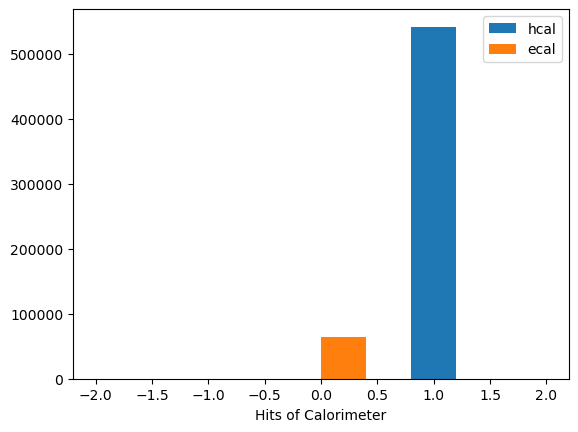

In [48]:
plt.hist(index_hcal, range=(-2,2), label='hcal')
plt.hist(index_ecal, range=(-2,2), label='ecal')
plt.xlabel("Hits of Calorimeter")
plt.legend()

#print(means['.position.z'])

1.4503321647644043


Text(-0.0017534494400024414, 101263.0, 'Std= 1.00 ')

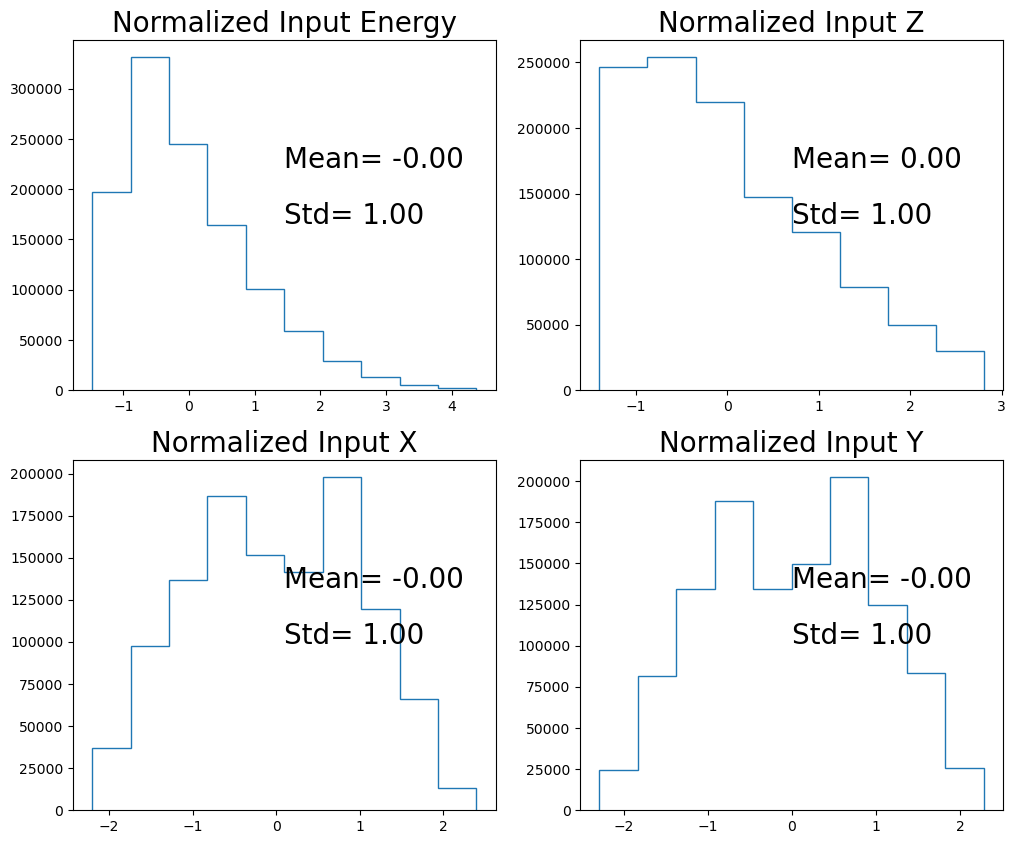

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

n, bins, _ =axes[0,0].hist(energy_norm, histtype='step')
xfor_text=(np.min(energy_norm)+ np.max(energy_norm))/2.
axes[0,0].set_title("Normalized Input Energy", fontsize=20)
print(xfor_text)
axes[0,0].text(xfor_text, np.max(n)/1.5 ,f"Mean= {means[0]:.2f} ", fontsize=20)
axes[0,0].text(xfor_text, np.max(n)/2., f"Std= {std_devs[0]:.2f} ", fontsize=20)

n, bins, _ =axes[0,1].hist(z_norm, bins=8, histtype='step')
xfor_text=(np.min(z_norm)+ np.max(z_norm))/2.
axes[0,1].set_title("Normalized Input Z", fontsize=20)
axes[0,1].text(xfor_text, np.max(n)/1.5 ,f"Mean= {means[1]:.2f} ", fontsize=20)
axes[0,1].text(xfor_text, np.max(n)/2., f"Std= {std_devs[1]:.2f} ", fontsize=20)


n, bins, _ =axes[1,0].hist(x_norm, histtype='step')
xfor_text=(np.min(x_norm)+ np.max(x_norm))/2.
axes[1,0].set_title("Normalized Input X", fontsize=20)
axes[1,0].text(xfor_text, np.max(n)/1.5 ,f"Mean= {means[2]:.2f} ", fontsize=20)
axes[1,0].text(xfor_text, np.max(n)/2., f"Std= {std_devs[2]:.2f} ", fontsize=20)


n, bins, _ =axes[1,1].hist(y_norm, histtype='step')
xfor_text=(np.min(y_norm)+ np.max(y_norm))/2.
axes[1,1].set_title("Normalized Input Y", fontsize=20)
axes[1,1].text(xfor_text, np.max(n)/1.5 ,f"Mean= {means[3]:.2f} ", fontsize=20)
axes[1,1].text(xfor_text, np.max(n)/2., f"Std= {std_devs[3]:.2f} ", fontsize=20)



In [66]:
epsilon=1e-10
a=np.log10(3.09409941e-03)
b=np.log10(3.09409941e-03 + epsilon)
c=np.log10(0+epsilon)
print(a-b)

-1.4036216189339257e-08


Mean of centers  4448.0
 [-2.24038877 -1.24038877 -0.24038877  0.75961123  1.75961123  2.75961123]
[3818.  3975.5 4133.  4290.5 4448.  4605.5 4763.  4920.5 5078. ]
zcenters--- [3896.75 4054.25 4211.75 4369.25 4526.75 4684.25 4841.75 4999.25]
bins ---- [-1.74038877 -1.31115332 -0.88191786 -0.4526824  -0.02344695  0.40578851
  0.83502397  1.26425942  1.69349488]
bin center  [-1.52577104 -1.09653559 -0.66730013 -0.23806467  0.19117078  0.62040624
  1.04964169  1.47887715]


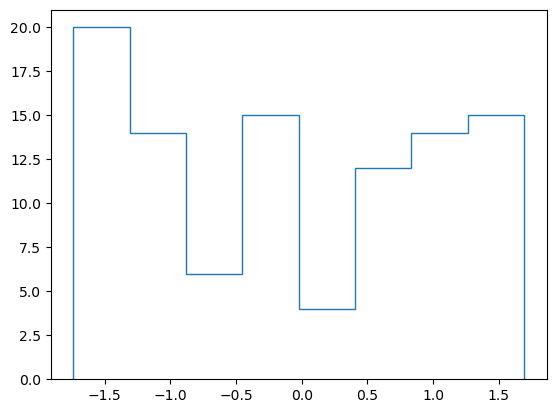

In [30]:
z_min, z_max= 3818, 5078
num_z_layers=8
z_events = np.random.uniform(z_min, z_max, 100)
z_layers=np.linspace(z_min,z_max, num_z_layers+1)
z_centers = (z_layers[1:] + z_layers[:-1] ) / 2
mean_z_centers=np.mean(z_centers)
print('Mean of centers ', mean_z_centers)
std_z_centers=np.std(z_centers)
norm_z=(z_events-mean_z_centers)/std_z_centers
bin_edges=np.arange(np.min(norm_z), np.max(norm_z)+2)-0.5
print('', bin_edges)
print(z_layers)
print('zcenters---', z_centers)
#z=z_norm*stdvs['.position.z'] + means['.position.z']
count, bins, _=plt.hist(norm_z, bins=num_z_layers,histtype='step')
bin_center = (bins[1:] + bins[:-1]) / 2
print('bins ----', bins)
print('bin center ',bin_center)
#print(np.unique(z))
#print(np.diff(np.unique(z)))


In [31]:
6.53076160e-04 + 2.82043461e-02

0.028857422259999998

In [ ]:
z_min, z_max= 3818, 5078
num_z_layers=8
z_layers=np.linspace(z_min,z_max, num_z_layers+1)
z_centers = (z_layers[1:] + z_layers[:-1] ) / 2

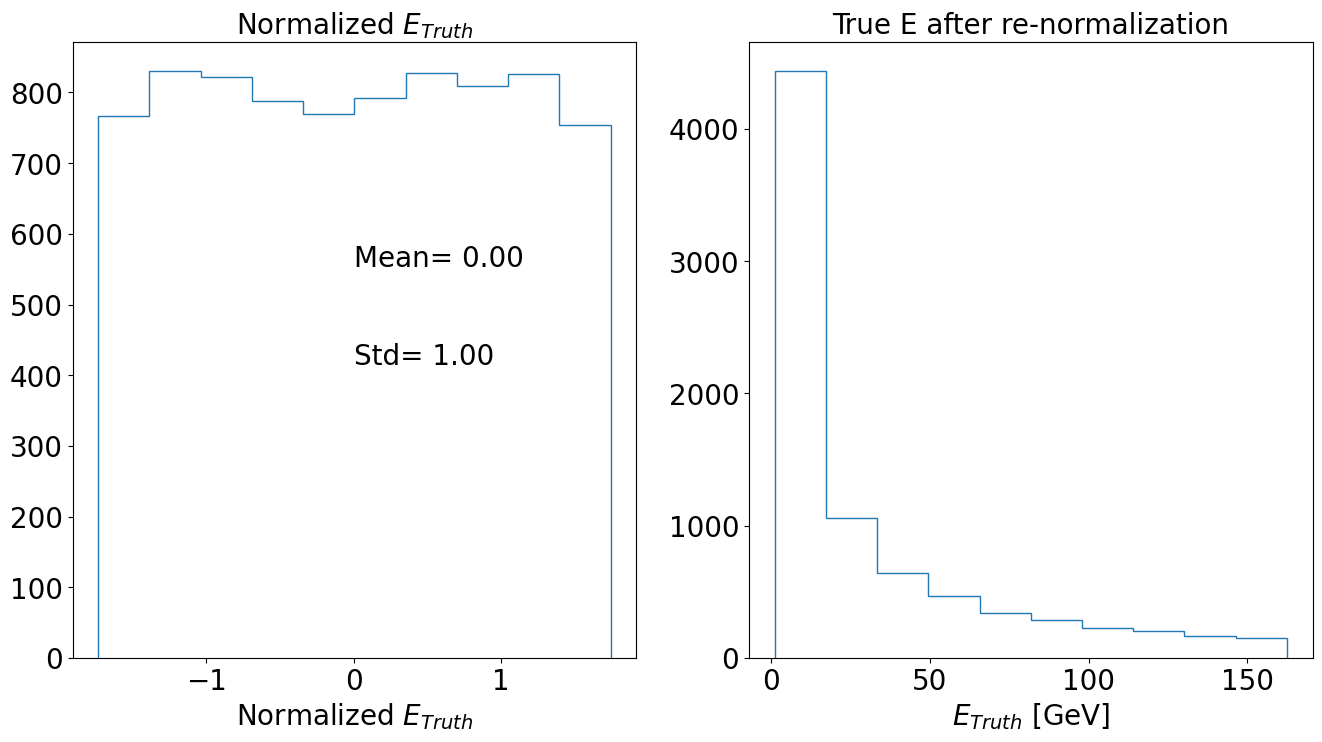

In [5]:
if output_dim==2:
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))

    n, bins, _ =axes[0,0].hist(genP_E, histtype='step')
    axes[0,0].set_title("Normalized $E_{Truth}$", fontsize=20)
    axes[0,0].text(0, np.max(n)/1.5 ,f"Mean= {means[4]:.2f} ", fontsize=20)
    axes[0,0].text(0, np.max(n)/2., f"Std= {std_devs[4]:.2f} ", fontsize=20)
    axes[0,0].yaxis.set_tick_params(labelsize=20)
    axes[0,0].xaxis.set_tick_params(labelsize=20)

    n, bins, _ =axes[0,1].hist(theta, histtype='step')
    axes[0,1].set_title(r"Normalized  $\theta_{Truth}$", fontsize=20)
    axes[0,1].text(0, np.max(n)/1.5 ,f"Mean= {means[5]:.2f} ", fontsize=20)
    axes[0,1].text(0, np.max(n)/2., f"Std= {std_devs[5]:.2f} ", fontsize=20)
    axes[0,1].yaxis.set_tick_params(labelsize=20)
    axes[0,1].xaxis.set_tick_params(labelsize=20)


    axes[1,0].hist(genP_corr, histtype='step')
    axes[1,0].set_title("True E after re-normalization", fontsize=20)
    axes[1,0].set_xlabel(r'$E_{Truth}$ [GeV]',  fontsize=20)
    axes[1,0].yaxis.set_tick_params(labelsize=20)
    axes[1,0].xaxis.set_tick_params(labelsize=20)



    axes[1,1].hist(true_gen_theta, histtype='step')
    axes[1,1].set_title(r"Input $\theta$ After re-normalization", fontsize=20)
    axes[1,1].set_xlabel(r'$\theta_{Truth}$ [mrad]', fontsize=20)
    axes[1,1].yaxis.set_tick_params(labelsize=20)
    axes[1,1].xaxis.set_tick_params(labelsize=20)

else:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    n, bins, _ =axes[0].hist(genP_E, histtype='step')
    axes[0].set_title("Normalized $E_{Truth}$", fontsize=20)
    axes[0].text(0, np.max(n)/1.5 ,f"Mean= {means[4]:.2f} ", fontsize=20)
    axes[0].text(0, np.max(n)/2., f"Std= {std_devs[4]:.2f} ", fontsize=20)
    axes[0].set_title("Normalized $E_{Truth}$", fontsize=20)
    axes[0].yaxis.set_tick_params(labelsize=20)
    axes[0].xaxis.set_tick_params(labelsize=20)
    axes[0].set_xlabel("Normalized $E_{Truth}$", fontsize=20)
    
    axes[1].hist(genP_corr, histtype='step')
    axes[1].set_title("True E after re-normalization", fontsize=20)
    axes[1].set_xlabel(r'$E_{Truth}$ [GeV]', fontsize=20)
    
    axes[1].yaxis.set_tick_params(labelsize=20)
    axes[1].xaxis.set_tick_params(labelsize=20)




ValueError: x and y must be the same size

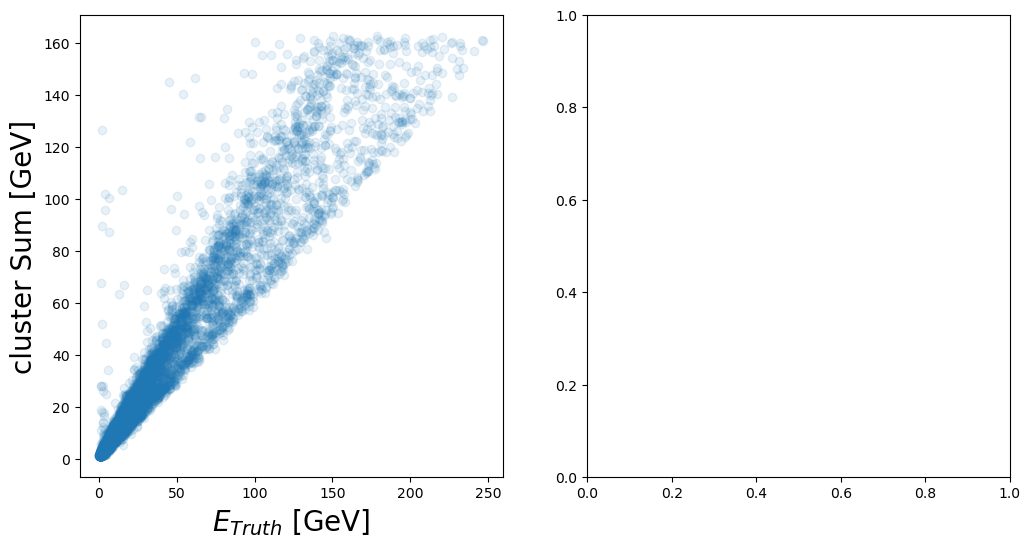

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(pred_corr, genP_corr, alpha=0.1)
ax1.set_ylabel("cluster Sum [GeV]", fontsize=20)
ax1.set_xlabel("$E_{Truth}$ [GeV]", fontsize=20)

ax2.scatter(genP_E, theta, alpha=0.1)
ax2.set_xlabel("Normalized $E_{Truth}$", fontsize=20)
ax2.set_ylabel("Normalized $\\Theta_{Truth}$ ", fontsize=20)
#plt.legend()


In [100]:
0.004070918796420502  posx == 0.35178978775456227 pos y =  0.06282057124936999   pos z =  3792.0791245203177

genE=  85.39139077336833  theta =  4.36874140625

In [36]:
np.log10(0.004070918796420502 )--2.8526349894620857

0.462327428953198

In [38]:
37920.791245203177 - 38086.713496613724

-165.9222514105495

In [76]:
zmin, zmax=3817.02 ,   5098.3
zseg=8
zlayers=np.linspace(zmin,zmax , zseg+1)
zcenters=(zlayers[1:] + zlayers[:-1])/2
print(zlayers)
print(zcenters)

[3817.02 3977.18 4137.34 4297.5  4457.66 4617.82 4777.98 4938.14 5098.3 ]
[3897.1  4057.26 4217.42 4377.58 4537.74 4697.9  4858.06 5018.22]


In [71]:
  
a= 9.88769578e-04 + 1.44653325e-03 +6.34765602e-04  + 1.29394536e-03  + 3.23486340e-04  + 3.02734366e-03
print(a)

b=  1.23291020e-03+ 9.70458984e-03 + 7.56835914e-04
print(b)
c= 6.59179699e-04 +  2.65502930e-03  + 9.12475586e-03  + 1.59973148e-02  + 6.77490258e-04 + 6.65283180e-04
print(c)
d= 9.52148461e-04 + 1.81884761e-03  
print(d)
e=  
print(e)
f=3.29589850e-04 + 7.44628895e-04
print(f)

0.00771484379
0.011694335953999999
0.029779053096999998
0.001086425764
0.00586547854
0.001074218745
